# Figures data Prades - $\Delta^{14}$C



### Libraries

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import re
import seaborn as sns
from statannotations.Annotator import Annotator
from scipy import stats
from statistics import median

In [23]:
# Conversion Fm (Fraction Modern) to $\Delta$^14^C
def fm_D14C(fm,yr,lft=8267):
    dcy=fm*np.exp((1950-yr)/lft)
    D14C=(dcy-1)*1000
    return D14C

#Conversion $\Delta$^14^C to Fm (Fraction Modern)
def D14C_fm(D14C,yr,lft=8267):
    fm=(D14C/1000+1)*np.exp((yr-1950)/lft)
    return fm

# symbols for p_value
def p_value(pp):
    if pp>5e-2:pstar='ns'
    elif pp>1e-2:pstar='*'
    elif pp>1e-3:pstar='**'
    elif pp>1e-4:pstar='***'
    else: pstar='****'
    return pstar

# closest value and other column associated to that value
def find_closest_value(df, target_col, value_col, target_value):
    if df.empty:
        return None, None
    df['difference']=abs(df[target_col]-target_value)
    closest_index=df['difference'].idxmin()
    closest_value=df[target_col][closest_index]
    associated_value=df[value_col][closest_index]
    df.drop(columns=['difference'], inplace=True)
    
    return closest_value, associated_value

In [24]:
pools=['ER','FFSR','Soil inc. 0-5','Soil inc. 5-10', 'Wood', 'Foliage','Fine litter','Coarse litter', 'Roots 0-5','Roots 5-10', 'Roots 10-15', 'Roots 15-20', 'Soil 0-5', 'Soil 5-10', 'Soil 10-15', 'Soil 15-20']
f14c=np.zeros([2,len(pools)])*np.nan # % of carbon. control, drought.
f14c_sd=np.zeros([2,len(pools)])*np.nan # standard deviation of % of carbon. control, drought.
test=np.zeros(len(pools))*np.nan

control=[5,7,9,10]
drought=[2,3,4,6]

### Reference values (atmospheric)

In [25]:
F14C_atmod=0.9975615225273415 # Modeled value.

bkg=pd.read_excel('Data/LabResults/Air_ecosystem_d14C.xlsx',header=31) # Measured in the field.
bkg=bkg[bkg['Plot']=='bkg'].reset_index(drop=True)

# F14C_atm=np.mean([bkg.F14C.mean(),F14C_atmod]) # mean
# D14C_atm=fm_D14C(F14C_atm,2024)

# considering only one value from samples.
F14C_atm=bkg.F14C[0]  # only the first value (the other one is very high).
D14C_atm=fm_D14C(F14C_atm,2024)

# considering only the simulated value.
#F14C_atm=F14C_atmod  # only the first value (the other one is very high).
#D14C_atm=fm_D14C(F14C_atm,2024)
#D14C_atm

In [6]:
D14C_atm

-5.739824967220475

## Soil respiration 

In [26]:
data=pd.read_excel('Data/LabResults/Air_soil_field_d14C.xlsx',header=30)
data['datetime'] = pd.to_datetime(data['Collection_date'].dt.strftime('%Y-%m-%d') + data['Collection_time'].astype(str), format = '%Y-%m-%d%H:%M:%S')
plot=np.empty(len(data),dtype=int); treatment=['']*len(data)
for i in range(len(data)):
    plot[i]=data['Probe'][i].split('_')[3]
    treatment[i]=data['Probe'][i].split('_')[4]
data['plot']=plot; data['treatment']=treatment

data.loc[data['treatment']=='control','treatment']='Control'
data.loc[data['treatment']=='drought','treatment']='Drought'

con=data[data['plot'].isin(control)] ; conf=con
dro=data[data['plot'].isin(drought)] ; drof=dro

b=data[data.columns[4]]-D14C_atm # substract D14C atmospheric
data['D']=b

dataf=data
FFSR=data

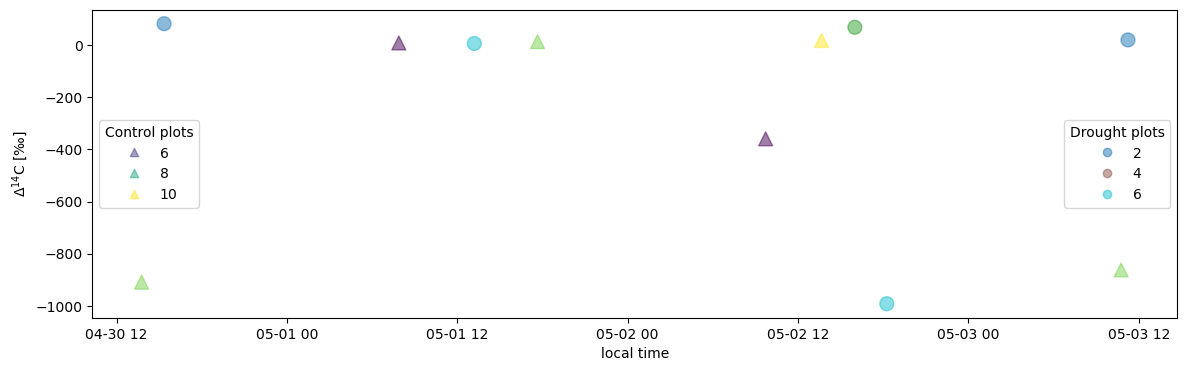

In [27]:
v='D'# F: F14C, D: D14C.

if v=='F': vv=data.columns[2];tity='F$^{14}$C [-]'  
if v=='D': vv=data.columns[4];tity='$\Delta^{14}$C [‰]'
    
fig=plt.subplots(figsize=[14,4])
scatter1=plt.scatter(con.datetime,con[vv],c=con['plot'],marker='^',alpha=0.5,s=100)
legend1=plt.legend(*scatter1.legend_elements(num=3),title="Control plots",loc="center left")
plt.gca().add_artist(legend1)
scatter2=plt.scatter(dro.datetime,dro[vv],c=dro['plot'],cmap=plt.cm.tab10,marker='o',alpha=0.5,s=100)
plt.ylabel(tity); plt.xlabel('local time')
legend2=plt.legend(*scatter2.legend_elements(num=3),title='Drought plots')

#### Without very negative values

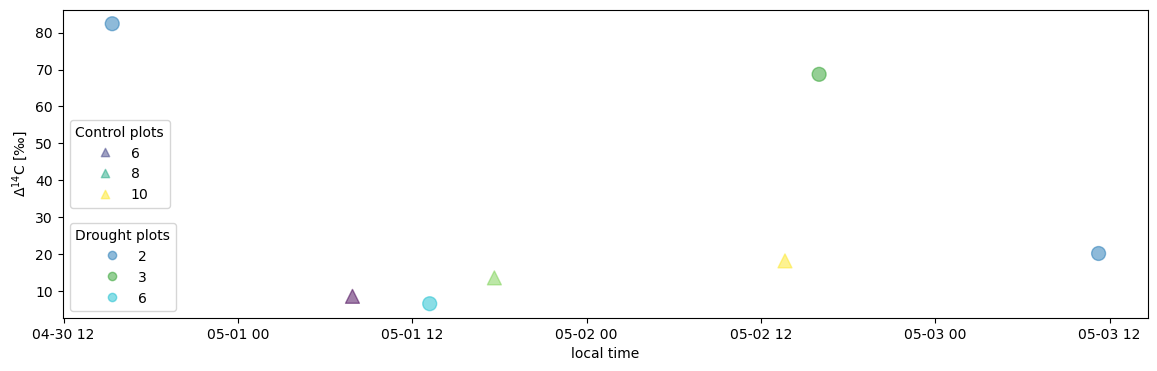

In [28]:
v='D'# F: F14C, D: D14C.

if v=='F': vv=data.columns[2];tity='F$^{14}$C [-]'  
if v=='D': vv=data.columns[4];tity='$\Delta^{14}$C [‰]'
    
fig=plt.subplots(figsize=[14,4])
con=con[con[con.columns[4]]>-300]
scatter1=plt.scatter(con.datetime,con[vv],c=con['plot'],marker='^',alpha=0.5,s=100)
legend1=plt.legend(*scatter1.legend_elements(num=3),title="Control plots",loc="center left")
plt.gca().add_artist(legend1)
dro=dro[dro[dro.columns[4]]>-300]
scatter2=plt.scatter(dro.datetime,dro[vv],c=dro['plot'],cmap=plt.cm.tab10,marker='o',alpha=0.5,s=100)
plt.ylabel(tity); plt.xlabel('local time')
legend2=plt.legend(*scatter2.legend_elements(),title='Drought plots',loc="lower left")

/home/_ehoyos/anaconda3/envs/bgc_md2/lib/python3.9/site-packages/matplotlib/axes/_base.py:2539: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


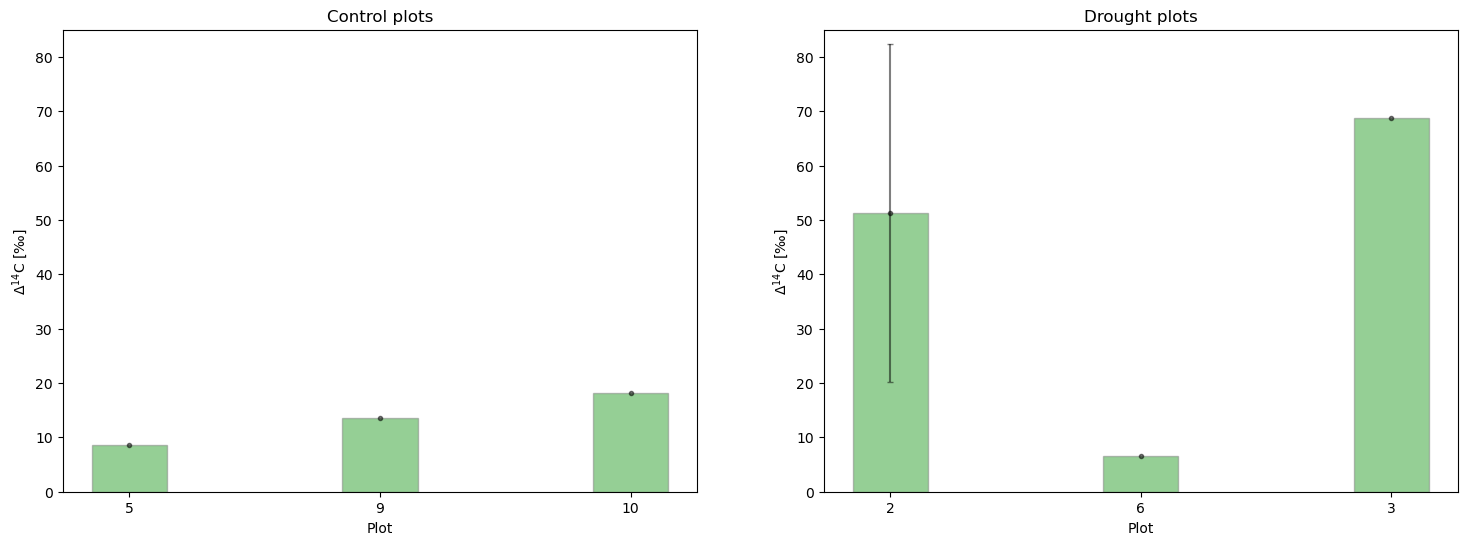

In [29]:
v='D'# F: F14C, D: D14C.

if v=='F': vv=data.columns[2];tity='F$^{14}$C [-]'; x1=0; x2=1.2 
if v=='D': vv=data.columns[4];tity='$\Delta^{14}$C [‰]'; x1=0; x2=85

con=data[data['plot'].isin(control)]
dro=data[data['plot'].isin(drought)]

## removing very negative values:
con=con[con[con.columns[4]]>-300]; dro=dro[dro[dro.columns[4]]>-300]

fig,axs=plt.subplots(1,2,figsize=[18,6])
cmap=plt.cm.tab10
colors=cmap(np.linspace(0,1,8))

barWidth=0.30
br=np.arange(3)

res=np.zeros([2,3])*np.nan; std=np.zeros([2,3])*np.nan
control2=con['plot'].unique(); drought2=dro['plot'].unique()
for i in range(3):
    w=con[con['plot']==control2[i]]
    res[0,i]=w[vv].mean();std[0,i]=w[vv].std()/np.sqrt(len(w[~w[vv].isna()]))
    w=dro[dro['plot']==drought2[i]]
    res[1,i]=w[vv].mean();std[1,i]=w[vv].std()/np.sqrt(len(w[~w[vv].isna()]))

axs[0].bar(br,res[0,],width=barWidth,edgecolor='grey',label=control2[i],color=colors[i],alpha=0.5) 
axs[0].errorbar(br,res[0,],std[0,],fmt='.',color='Black',alpha=0.5,capsize=2)
axs[1].bar(br,res[1,],width=barWidth,edgecolor='grey',label=drought[i],color=colors[i],alpha=0.5) 
axs[1].errorbar(br,res[1,],std[1,],fmt='.',color='Black',alpha=0.5,capsize=2)
axs[0].set_title('Control plots');axs[1].set_title('Drought plots')
axs[0].set_ylim(x1,x2);axs[1].set_ylim(x1,x2)
axs[0].set_xlabel('Plot');axs[1].set_xlabel('Plot')
axs[0].set_ylabel(tity);axs[1].set_xlabel('Plot'); axs[1].set_ylabel(tity);axs[1].set_xlabel('Plot')
axs[0].set_xticks([r for r in range(len(control2))],control2)
axs[1].set_xticks([r for r in range(len(drought2))],drought2)


(0.0, 0.6)

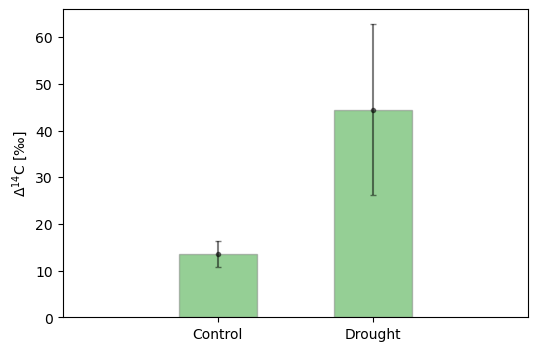

In [30]:
v='D'# F: F14C, D: D14C.

if v=='F': vv=data.columns[2];tity='F$^{14}$C [-]'  
if v=='D': vv=data.columns[4];tity='$\Delta^{14}$C [‰]'
    
con=data[data['plot'].isin(control)]
dro=data[data['plot'].isin(drought)]

## removing very negative values:
con=con[con[con.columns[4]]>-300]; dro=dro[dro[dro.columns[4]]>-300]

fig=plt.subplots(figsize=(6,4)) 
barWidth=0.1
br=[0.2,0.4]

res=np.zeros(2)*np.nan; std=np.zeros(2)*np.nan
w=con[con[vv].notnull()];res[0]=w[vv].mean(); std[0]=w[vv].std()/np.sqrt(len(w[~w[vv].isna()]))
w=dro[dro[vv].notnull()];res[1]=w[vv].mean(); std[1]=w[vv].std()/np.sqrt(len(w[~w[vv].isna()]))

f14c[:,1]=res; f14c_sd[:,1]=std

plt.bar(br,res,width=barWidth,edgecolor='grey',label=control2[i],color=colors[i],alpha=0.5) 
plt.errorbar(br,res,std,fmt='.',color='Black',alpha=0.5,capsize=2)
plt.ylabel(tity)
plt.xticks([r for r in br],['Control','Drought'])
plt.xlim(0,0.6)

##### Statistical test

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Drought vs. Control: Kruskal-Wallis independent samples (pairwise between groups), P_val:2.888e-01 Stat=1.125e+00


/tmp/ipykernel_25954/3763974013.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axs, **hue_plot_params)
/tmp/ipykernel_25954/3763974013.py:20: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(ax=axs, **hue_plot_params)


Text(0.5, 14.722222222222216, 'Treatment')

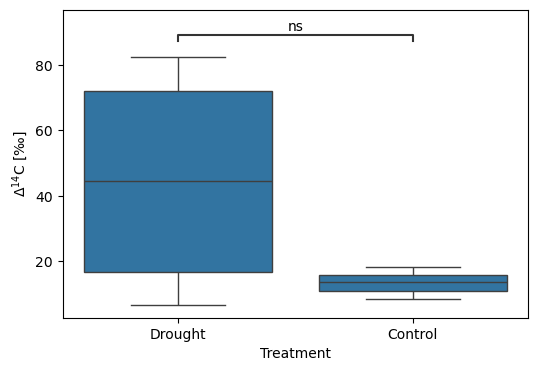

In [31]:
v='D'# F: F14C, D: D14C., A: D14C-D14C_atm
if v=='F':vv=data.columns[2];tity='F$^{14}$C [-]'
if v=='D':vv=data.columns[4];tity='$\Delta^{14}$C [‰]'
if v=='A':vv=data.D; tity='$\Delta^{14}$C-$\Delta^{14}$C$_{atm}$ [‰]'
## Remove very negative values
#df=data
df=data[data[data.columns[4]]>-300]

fig,axs=plt.subplots(figsize=[6,4])
pairs=[[('Control'), ('Drought')]]

states_palette = sns.color_palette("tab10", n_colors=1)
hue_plot_params = {
    'data':df,
    'x': "treatment",
    'y': vv,
    "palette": states_palette
}

sns.boxplot(ax=axs, **hue_plot_params)
annotator = Annotator(axs, pairs, **hue_plot_params)
annotator.configure(test='Kruskal').apply_and_annotate()
axs.set_ylabel(tity); axs.set_xlabel('Treatment')



##t-test_ind, t-test_welch, t-test_paired, Mann-Whitney, Mann-Whitney-gt, Mann-Whitney-ls, Levene*, Wilcoxon, Kruskal, Brunner-Munzel

In [32]:
# save results of statistical test.
_, results = annotator.apply_and_annotate()
stat_results=[result.data.pvalue for result in results]
w=np.array(stat_results)

test[1]=w

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Drought vs. Control: Kruskal-Wallis independent samples (pairwise between groups), P_val:2.888e-01 Stat=1.125e+00


<Figure size 640x480 with 0 Axes>

### F$^{14}$C or $\Delta^{14}$C from incubations

In [33]:
data=pd.read_excel('Data/LabResults/Air_soil_incub_d14C.xlsx',header=30)

temp=re.compile("([a-zA-Z]+)([0-9]+)")
plot=np.empty(len(data),dtype=int); depth=['']*len(data); treat=['']*len(data)
for i in range(len(data)):
    b=data['Probe'][i].split('_')[1]
    plot[i]=temp.match(b).groups()[1]
    depth[i]=(data['Probe'][i].split('_')[-1]).split(' ')[0]
    if plot[i] in control: treat[i]='Control'
    if plot[i] in drought: treat[i]='Drought'
    
data['plot']=plot; data['depth']=depth; data['treatment']=treat 
depths=data.depth.unique()

con=data[data['plot'].isin(control)] 
dro=data[data['plot'].isin(drought)] 

b=data[data.columns[4]]-D14C_atm # substract D14C atmospheric
data['D']=b

datai=data
Soil_inc=data

([<matplotlib.axis.XTick at 0x7fa5bad420d0>,
 [Text(0.125, 0, '0-5'), Text(1.125, 0, '5-10')])

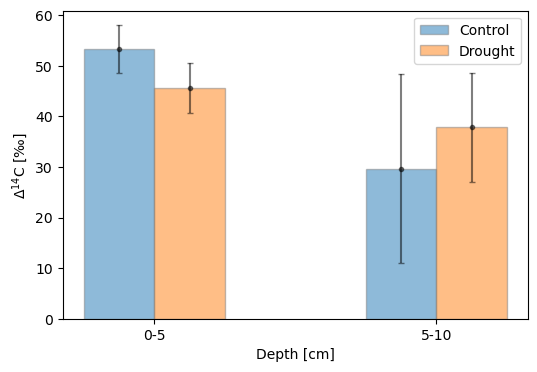

In [34]:
v='D'# F: F14C, D: D14C.

if v=='F': vv=data.columns[2];tity='F$^{14}$C [-]'  
if v=='D': vv=data.columns[4];tity='$\Delta^{14}$C [‰]'
   
fig=plt.subplots(figsize=(6,4)) 
cmap=plt.cm.tab10
colors=cmap(np.linspace(0,1,8))
barWidth=0.25 
br1=np.arange(2) 
br2=[x+barWidth for x in br1]

res=np.empty(len(depths));std=np.empty(len(depths))
for i in range(len(depths)):
    res[i]=con[vv][con.depth==depths[i]].mean()
    a=con[vv][con.depth==depths[i]]
    std[i]=a.std()/np.sqrt(len(a[~a.isna()]))
plt.bar(br1,res,width=barWidth,edgecolor='grey',label ='Control',alpha=0.5) 
plt.errorbar(br1,res,std,fmt='.',color='Black',alpha=0.5,capsize=2)
f14c[0,2:4]=res; f14c_sd[0,2:4]=std

res=np.empty(len(depths));std=np.empty(len(depths))
for i in range(len(depths)):
    res[i]=dro[vv][dro.depth==depths[i]].mean()
    a=dro[vv][dro.depth==depths[i]]
    std[i]=a.std()/np.sqrt(len(a[~a.isna()]))
plt.bar(br2,res,width=barWidth,edgecolor='grey',label='Drought',alpha=0.5) 
plt.errorbar(br2,res,std,fmt='.',color='Black',alpha=0.5,capsize=2)
f14c[1,2:4]=res; f14c_sd[1,2:4]=std

plt.legend()
plt.ylabel(tity);plt.xlabel('Depth [cm]')
plt.xticks([r+barWidth/2 for r in range(len(depths))],depths)

##### Statistical test

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

5-10_Control vs. 5-10_Drought: Kruskal-Wallis independent samples (pairwise between groups), P_val:1.000e+00 Stat=0.000e+00
0-5_Control vs. 0-5_Drought: Kruskal-Wallis independent samples (pairwise between groups), P_val:2.482e-01 Stat=1.333e+00


Text(0.5, 14.722222222222216, 'Depth [cm]')

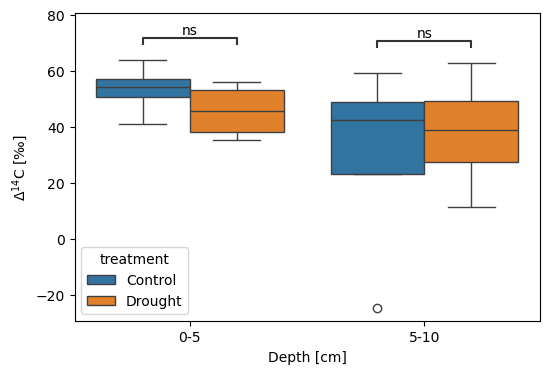

In [35]:
v='D'# F: F14C, D: D14C., A:D14C-D14C_atm

if v=='F': vv=data.columns[2];tity='F$^{14}$C [-]'  
if v=='D': vv=data.columns[4];tity='$\Delta^{14}$C [‰]'
if v=='A':vv=data.D; tity='$\Delta^{14}$C-$\Delta^{14}$C$_{atm}$ [‰]'

fig,axs=plt.subplots(figsize=[6,4])
treat=['Control','Drought']

pairs = [
    [('0-5', 'Control'), ('0-5', 'Drought')],
    [('5-10', 'Control'), ('5-10', 'Drought')],
]

states_palette = sns.color_palette("tab10", n_colors=2)
states_order = treat
subcat_order = depths
hue_plot_params = {
    'data': data,
    'x': "depth",
    'y': vv,
    "order": subcat_order,
    "hue": "treatment",
    "hue_order": states_order,
    "palette": states_palette
}

sns.boxplot(ax=axs, **hue_plot_params)
annotator = Annotator(axs, pairs, **hue_plot_params)
annotator.configure(test='Kruskal').apply_and_annotate()
axs.set_ylabel(tity);axs.set_xlabel('Depth [cm]')
##t-test_ind, t-test_welch, t-test_paired, Mann-Whitney, Mann-Whitney-gt, Mann-Whitney-ls, Levene*, Wilcoxon, Kruskal, Brunner-Munzel

In [36]:
# save results of statistical test.
_, results = annotator.apply_and_annotate()
stat_results=[result.data.pvalue for result in results]
w=np.array(stat_results)

temp=w[0]
w[0]=w[1]
w[1]=temp

test[2:4]=w

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

5-10_Control vs. 5-10_Drought: Kruskal-Wallis independent samples (pairwise between groups), P_val:1.000e+00 Stat=0.000e+00
0-5_Control vs. 0-5_Drought: Kruskal-Wallis independent samples (pairwise between groups), P_val:2.482e-01 Stat=1.333e+00


<Figure size 640x480 with 0 Axes>

#### Comparison between depths

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0-5_Control vs. 5-10_Control: Kruskal-Wallis independent samples (pairwise between groups), P_val:2.482e-01 Stat=1.333e+00
0-5_Drought vs. 5-10_Drought: Kruskal-Wallis independent samples (pairwise between groups), P_val:5.637e-01 Stat=3.333e-01


Text(0.5, 14.722222222222216, 'Depth [cm]')

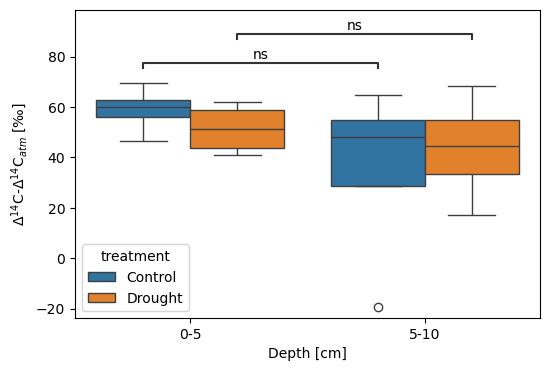

In [16]:
v='A'# F: F14C, D: D14C., A:D14C-D14C_atm

if v=='F': vv=data.columns[2];tity='F$^{14}$C [-]'  
if v=='D': vv=data.columns[4];tity='$\Delta^{14}$C [‰]'
if v=='A':vv=data.D; tity='$\Delta^{14}$C-$\Delta^{14}$C$_{atm}$ [‰]'

fig,axs=plt.subplots(figsize=[6,4])
treat=['Control','Drought']

pairs = [
    [('0-5', 'Control'), ('5-10', 'Control')],
    [('0-5', 'Drought'), ('5-10', 'Drought')],
]

states_palette = sns.color_palette("tab10", n_colors=2)
states_order = treat
subcat_order = depths
hue_plot_params = {
    'data': data,
    'x': "depth",
    'y': vv,
    "order": subcat_order,
    "hue": "treatment",
    "hue_order": states_order,
    "palette": states_palette
}

sns.boxplot(ax=axs, **hue_plot_params)
annotator = Annotator(axs, pairs, **hue_plot_params)
annotator.configure(test='Kruskal').apply_and_annotate()
axs.set_ylabel(tity);axs.set_xlabel('Depth [cm]')
##t-test_ind, t-test_welch, t-test_paired, Mann-Whitney, Mann-Whitney-gt, Mann-Whitney-ls, Levene*, Wilcoxon, Kruskal, Brunner-Munzel

### Comparison $\Delta^{14}$C incubations and field respiration

/home/_ehoyos/anaconda3/envs/bgc_md2/lib/python3.9/site-packages/matplotlib/axes/_base.py:2539: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


Text(0.5, 1.0, 'Drought')

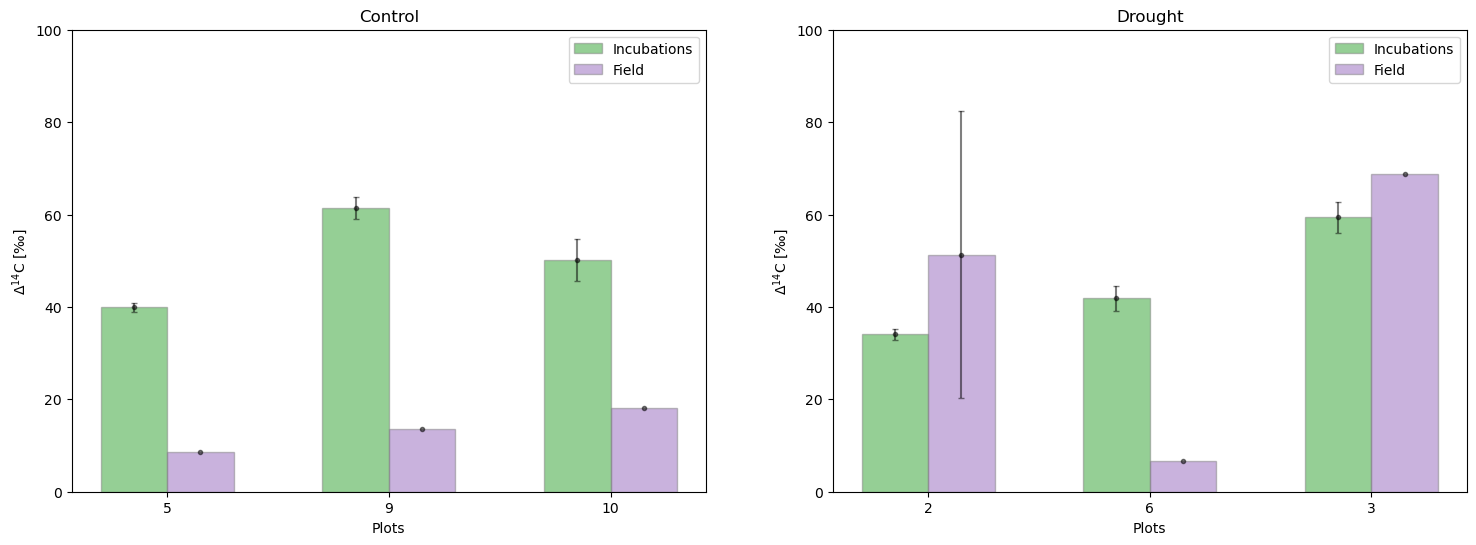

In [17]:
v='D'# F: F14C, D: D14C.

if v=='F': vv=data.columns[2];tity='F$^{14}$C [-]'; x1=0.95; x2=1.12
if v=='D': vv=data.columns[4];tity='$\Delta^{14}$C [‰]'; x1=0; x2=100 

## removing very negative values from field values:
conf=conf[conf[conf.columns[4]]>-300]; drof=drof[drof[drof.columns[4]]>-300]

comp=['Incubations','Field']
control2=conf['plot'].unique();drought2=drof['plot'].unique()
res1=np.empty([3,2]);std1=np.empty([3,2]) # control
res2=np.empty([3,2]);std2=np.empty([3,2]) # drought
for i in range(3):
    w=con[con['plot']==control2[i]];res1[i,0]=w[vv].mean();std1[i,0]=w[vv].std()/np.sqrt(len(w[~w[vv].isna()]))
    w=conf[conf['plot']==control2[i]];res1[i,1]=w[vv].mean();std1[i,1]=w[vv].std()/np.sqrt(len(w[~w[vv].isna()]))
    
    w=dro[dro['plot']==drought2[i]];res2[i,0]=w[vv].mean();std2[i,0]=w[vv].std()/np.sqrt(len(w[~w[vv].isna()]))
    w=drof[drof['plot']==drought2[i]];res2[i,1]=w[vv].mean();std2[i,1]=w[vv].std()/np.sqrt(len(w[~w[vv].isna()]))
    
fig,axs=plt.subplots(1,2,figsize=[18,6])
cmap=plt.cm.tab10
colors=cmap(np.linspace(0,1,8))
treat=['Control','Drought']

barWidth=0.3
br1=np.arange(3)
br2=[x+barWidth for x in br1] 
br=[br1,br2]

for i in range(2):
    axs[0].bar(br[i],res1[:,i],width=barWidth,edgecolor='grey',label=comp[i],color=colors[i+2],alpha=0.5) 
    axs[0].errorbar(br[i],res1[:,i],std1[:,i],fmt='.',color='Black',alpha=0.5,capsize=2)
    axs[1].bar(br[i],res2[:,i],width=barWidth,edgecolor='grey',label=comp[i],color=colors[i+2],alpha=0.5) 
    axs[1].errorbar(br[i],res2[:,i],std2[:,i],fmt='.',color='Black',alpha=0.5,capsize=2)
    axs[i].set_ylabel(tity); axs[i].set_xlabel('Plots')
    
    axs[i].set_ylim(x1,x2)

axs[0].legend(); axs[1].legend()
axs[0].set_xticks([r+barWidth/2 for r in range(len(control2))],control2)
axs[1].set_xticks([r+barWidth/2 for r in range(len(drought2))],drought2)
axs[0].set_title('Control');axs[1].set_title('Drought')


/tmp/ipykernel_8684/3372787297.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datai['Respiration']=a; dataf['Respiration']=b


([<matplotlib.axis.XTick at 0x7f8d35316970>,
 [Text(0.125, 0, 'Control'), Text(1.125, 0, 'Drought')])

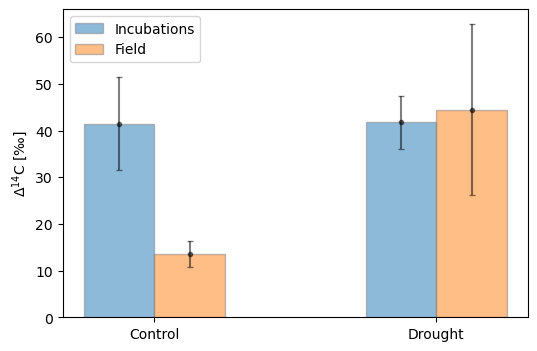

In [20]:
v='D'# F: F14C, D: D14C., A: D14C-D14atm

dataf=dataf[dataf[dataf.columns[4]]>-300] # remove very negative values.
a=['Incubations']*len(datai);b=['Field']*len(dataf)
datai['Respiration']=a; dataf['Respiration']=b
dataif=pd.concat([datai,dataf])

if v=='F': vv=dataif.columns[2];tity='F$^{14}$C [-]'  
if v=='D': vv=dataif.columns[4];tity='$\Delta^{14}$C [‰]'
#if v=='A': vv=dataif.D; tity='$\Delta^{14}$C-$\Delta^{14}$C$_{atm}$ [‰]'

fig,axs=plt.subplots(figsize=[6,4])
treat=['Control','Drought']

   
cmap=plt.cm.tab10
colors=cmap(np.linspace(0,1,8))
barWidth=0.25 
br1=np.arange(2) 
br2=[x+barWidth for x in br1]

res=np.empty(len(treat));std=np.empty(len(treat))
for i in range(len(treat)):
    a=dataif[dataif.Respiration=='Incubations']
    b=a[a.treatment==treat[i]][vv]
    res[i]=b.mean()

    std[i]=b.std()/np.sqrt(len(b[~b.isna()]))
plt.bar(br1,res,width=barWidth,edgecolor='grey',label ='Incubations',alpha=0.5) 
plt.errorbar(br1,res,std,fmt='.',color='Black',alpha=0.5,capsize=2)
# f14c[0,2:4]=res; f14c_sd[0,2:4]=std

res=np.empty(len(depths));std=np.empty(len(depths))
for i in range(len(depths)):
    a=dataif[dataif.Respiration=='Field']
    b=a[a.treatment==treat[i]][vv]
    res[i]=b.mean()

    std[i]=b.std()/np.sqrt(len(b[~b.isna()]))
plt.bar(br2,res,width=barWidth,edgecolor='grey',label='Field',alpha=0.5) 
plt.errorbar(br2,res,std,fmt='.',color='Black',alpha=0.5,capsize=2)


plt.legend()
plt.ylabel(tity)
plt.xticks([r+barWidth/2 for r in range(len(treat))],treat)

##### Statistic test

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Drought_Incubations vs. Drought_Field: Brunner-Munzel test, P_val:9.161e-01 W=1.142e-01
Control_Incubations vs. Control_Field: Brunner-Munzel test, P_val:1.994e-02 W=-3.000e+00


Text(0.5, 14.722222222222216, 'Treatment [cm]')

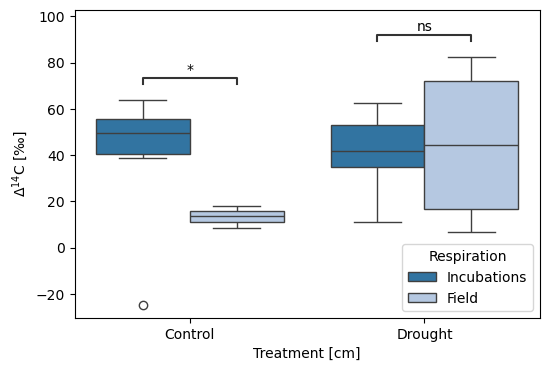

In [21]:
v='D'# F: F14C, D: D14C., A: D14C-D14atm

dataf=dataf[dataf[dataf.columns[4]]>-300] # remove very negative values.
a=['Incubations']*len(datai);b=['Field']*len(dataf)
datai['Respiration']=a; dataf['Respiration']=b
dataif=pd.concat([datai,dataf])

if v=='F': vv=dataif.columns[2];tity='F$^{14}$C [-]'  
if v=='D': vv=dataif.columns[4];tity='$\Delta^{14}$C [‰]'
if v=='A': vv=dataif.D; tity='$\Delta^{14}$C-$\Delta^{14}$C$_{atm}$ [‰]'

fig,axs=plt.subplots(figsize=[6,4])
treat=['Control','Drought']

pairs = [
    [('Control', 'Incubations'), ('Control', 'Field')],
    [('Drought', 'Incubations'), ('Drought', 'Field')],
]

states_palette = sns.color_palette("tab20", n_colors=2)
states_order = ['Incubations','Field']
subcat_order = treat
hue_plot_params = {
    'data': dataif,
    'x': "treatment",
    'y': vv,
    "order": subcat_order,
    "hue": "Respiration",
    "hue_order": states_order,
    "palette": states_palette
}

sns.boxplot(ax=axs, **hue_plot_params)
annotator = Annotator(axs, pairs, **hue_plot_params)
annotator.configure(test='Brunner-Munzel').apply_and_annotate()
axs.set_ylabel(tity);axs.set_xlabel('Treatment [cm]')
##t-test_ind, t-test_welch, t-test_paired, Mann-Whitney, Mann-Whitney-gt, Mann-Whitney-ls, Levene*, Wilcoxon, Kruskal, Brunner-Munzel

## Solids

### Soils

In [37]:
data=pd.read_excel('Data/LabResults/Solids_soil_d14C.xlsx',header=30)

temp=re.compile("([a-zA-Z]+)([0-9]+)")
plot=np.empty(len(data),dtype=int); depth=['']*len(data); treat=['']*len(data)
for i in range(len(data)):
    b=data['Probe'][i].split('_')[1]
    plot[i]=temp.match(b).groups()[1]
    depth[i]=(data['Probe'][i].split('_')[-1]).split(' ')[-1]
    if plot[i] in control: treat[i]='Control'
    if plot[i] in drought: treat[i]='Drought'
    
data['plot']=plot; data['depth']=depth; data['treatment']=treat 
depths=data.depth.unique()
w=depths[1]; depths[1]=depths[2]; depths[2]=w
b=data[data.columns[4]]-D14C_atm # substract D14C atmospheric
data['D']=b
con=data[data['plot'].isin(control)] 
dro=data[data['plot'].isin(drought)] 

Soil_solid=data


/home/_ehoyos/anaconda3/envs/bgc_md2/lib/python3.9/site-packages/matplotlib/axes/_base.py:2539: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


Text(0.5, 1.0, 'Drought')

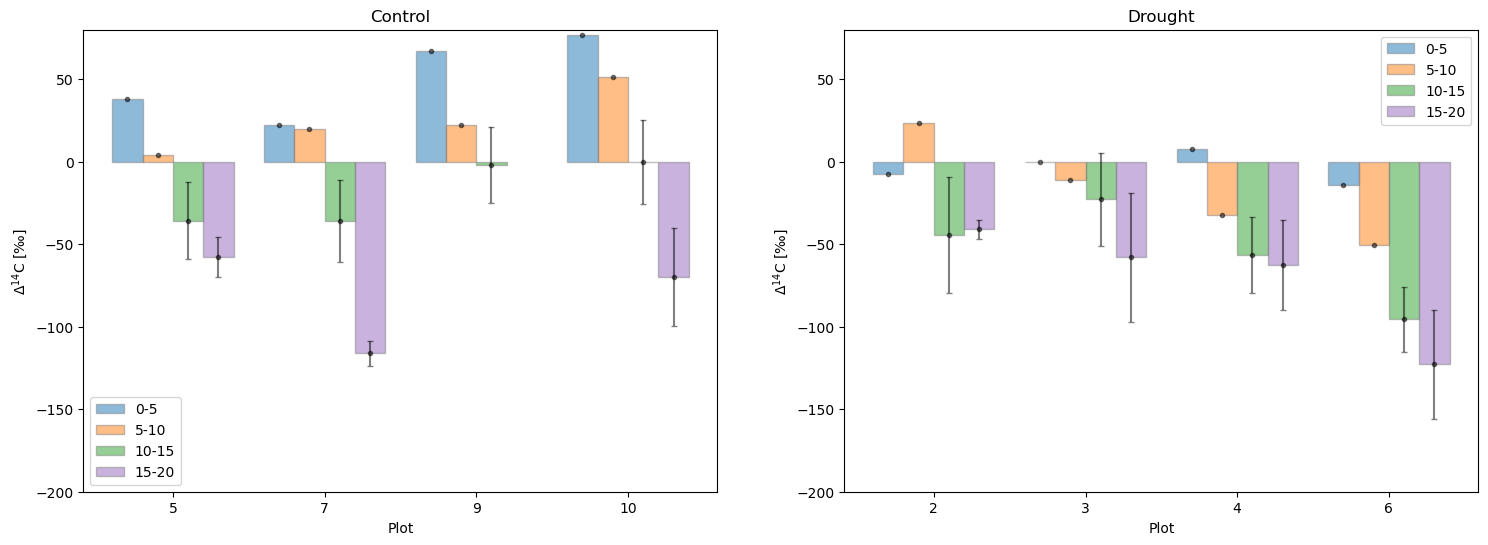

In [38]:
v='D'# F: F14C, D: D14C.

if v=='F': vv=data.columns[2];tity='F$^{14}$C [-]'; x1=0.8; x2=1.10
if v=='D': vv=data.columns[4];tity='$\Delta^{14}$C [‰]'; x1=-200; x2=80 
if v=='A': vv=data.columns[10]; tity='$\Delta^{14}$C-$\Delta^{14}$C$_{atm}$ [‰]'; x1=-170; x2=100

fig,axs=plt.subplots(1,2,figsize=[18,6])
cmap=plt.cm.tab10
colors=cmap(np.linspace(0,1,8))

barWidth=0.20
br1=np.arange(len(depths))
br2=[x+barWidth for x in br1] 
br3=[x+barWidth for x in br2]
br4=[x+barWidth for x in br3]
br=[br1,br2,br3,br4]

res1=np.zeros([4,len(depths)])*np.nan; std1=np.zeros([4,len(depths)])*np.nan
res2=np.zeros([4,len(depths)])*np.nan; std2=np.zeros([4,len(depths)])*np.nan
for i in range(4):
    for j in range(len(depths)):
        w=con[(con['plot']==control[i])&(con['depth']==depths[j])]
        res1[i,j]=w[vv].mean();std1[i,j]=w[vv].std()/np.sqrt(len(w[~w[vv].isna()]))
        w=dro[(dro['plot']==drought[i])&(dro['depth']==depths[j])]
        res2[i,j]=w[vv].mean();std2[i,j]=w[vv].std()/np.sqrt(len(w[~w[vv].isna()]))

for i in range(len(depths)):
    axs[0].bar(br[i],res1[:,i],width=barWidth,edgecolor='grey',label=depths[i],color=colors[i],alpha=0.5) 
    axs[0].errorbar(br[i],res1[:,i],std1[:,i],fmt='.',color='Black',alpha=0.5,capsize=2)
    axs[1].bar(br[i],res2[:,i],width=barWidth,edgecolor='grey',label=depths[i],color=colors[i],alpha=0.5) 
    axs[1].errorbar(br[i],res2[:,i],std2[:,i],fmt='.',color='Black',alpha=0.5,capsize=2)

for i in range(2):
    axs[i].legend(); axs[i].set_ylabel(tity); axs[i].set_xlabel('Plot');axs[i].set_ylim(x1,x2)
    if v=='F':axs[i].axhline(1,color='gray',linestyle='--'); axs[1].axhline(1,color='gray',linestyle='--') 
axs[0].set_xticks([r+barWidth*1.5 for r in range(len(control))],control)
axs[1].set_xticks([r+barWidth*1.5 for r in range(len(drought))],drought)
axs[0].set_title('Control'); axs[1].set_title('Drought')

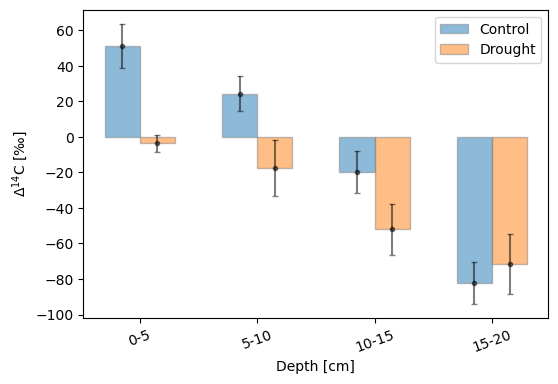

In [39]:
v='D'# F: F14C, D: D14C.

if v=='F': vv=data.columns[2];tity='F$^{14}$C [-]'
if v=='D': vv=data.columns[4];tity='$\Delta^{14}$C [‰]'
if v=='A': vv=data.columns[10]; tity='$\Delta^{14}$C-$\Delta^{14}$C$_{atm}$ [‰]'

fig,axs=plt.subplots(figsize=[6,4])
cmap=plt.cm.tab10
colors=cmap(np.linspace(0,1,8))
treat=['Control','Drought']

barWidth=0.3
br=np.arange(4)
br2=[x+barWidth for x in br1] 
br=[br1,br2]

res=np.zeros([2,len(depths)])*np.nan; std=np.zeros([2,len(depths)])*np.nan
for j in range(len(depths)):
    w=con[con['depth']==depths[j]]
    res[0,j]=w[vv].mean();std[0,j]=w[vv].std()/np.sqrt(len(w[~w[vv].isna()]))
    w=dro[dro['depth']==depths[j]]
    res[1,j]=w[vv].mean();std[1,j]=w[vv].std()/np.sqrt(len(w[~w[vv].isna()]))
f14c[:,12:16]=res; f14c_sd[:,12:16]=std
for i in range(2):
    plt.bar(br[i],res[i,:],width=barWidth,edgecolor='grey',label=treat[i],color=colors[i],alpha=0.5) 
    plt.errorbar(br[i],res[i,:],std[i,:],fmt='.',color='Black',alpha=0.5,capsize=2)
plt.legend()
plt.xticks([r+barWidth/2 for r in range(len(depths))],depths,rotation=20)
plt.ylabel(tity);plt.xlabel('Depth [cm]')
if v=='F':plt.axhline(1,color='gray',linestyle='--')

##### statistic test

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

10-15_Control vs. 10-15_Drought: Kruskal-Wallis independent samples (pairwise between groups), P_val:7.793e-02 Stat=3.108e+00
0-5_Control vs. 0-5_Drought: Kruskal-Wallis independent samples (pairwise between groups), P_val:2.092e-02 Stat=5.333e+00
5-10_Control vs. 5-10_Drought: Kruskal-Wallis independent samples (pairwise between groups), P_val:1.489e-01 Stat=2.083e+00
15-20_Control vs. 15-20_Drought: Kruskal-Wallis independent samples (pairwise between groups), P_val:5.820e-01 Stat=3.029e-01


Text(0.5, 14.722222222222216, 'Depth [cm]')

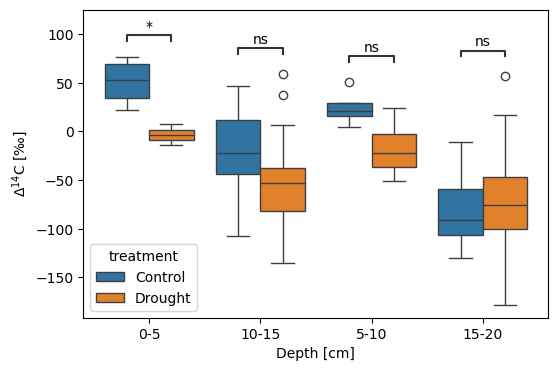

In [40]:
v='D'# F: F14C, D: D14C. A: D14C-D14Catm

if v=='F': vv=data.columns[2];tity='F$^{14}$C [-]'
if v=='D': vv=data.columns[4];tity='$\Delta^{14}$C [‰]'
if v=='A': vv=data.D; tity='$\Delta^{14}$C-$\Delta^{14}$C$_{atm}$ [‰]'

fig,axs=plt.subplots(figsize=[6,4])
treat=['Control','Drought']

pairs = [
    [('0-5', 'Control'), ('0-5', 'Drought')],
    [('5-10', 'Control'), ('5-10', 'Drought')],
    [('10-15', 'Control'), ('10-15', 'Drought')],
    [('15-20', 'Control'), ('15-20', 'Drought')],
]

depths=data.depth.unique()
states_palette=sns.color_palette("tab10", n_colors=2)
states_order=treat
subcat_order=depths
hue_plot_params = {
    'data':data,
    'x': "depth",
    'y': vv,
    "order": subcat_order,
    "hue": "treatment",
    "hue_order": states_order,
    "palette": states_palette
}

sns.boxplot(ax=axs, **hue_plot_params)
annotator = Annotator(axs, pairs, **hue_plot_params)
annotator.configure(test='Kruskal').apply_and_annotate()
axs.set_ylabel(tity);axs.set_xlabel('Depth [cm]')
##t-test_ind, t-test_welch, t-test_paired, Mann-Whitney, Mann-Whitney-gt, Mann-Whitney-ls, Levene*, Wilcoxon, Kruskal, Brunner-Munzel

In [41]:
# save results of statistical test.
_, results = annotator.apply_and_annotate()
stat_results=[result.data.pvalue for result in results]
w=np.array(stat_results)

temp=w[0];temp2=w[2]
w[0]=w[1]
w[1]=w[2]
w[2]=temp


test[12:16]=w

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

10-15_Control vs. 10-15_Drought: Kruskal-Wallis independent samples (pairwise between groups), P_val:7.793e-02 Stat=3.108e+00
0-5_Control vs. 0-5_Drought: Kruskal-Wallis independent samples (pairwise between groups), P_val:2.092e-02 Stat=5.333e+00
5-10_Control vs. 5-10_Drought: Kruskal-Wallis independent samples (pairwise between groups), P_val:1.489e-01 Stat=2.083e+00
15-20_Control vs. 15-20_Drought: Kruskal-Wallis independent samples (pairwise between groups), P_val:5.820e-01 Stat=3.029e-01


<Figure size 640x480 with 0 Axes>

#### Difference between depths

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

5-10_Control vs. 15-20_Control: Kruskal-Wallis independent samples (pairwise between groups), P_val:4.075e-03 Stat=8.250e+00
0-5_Control vs. 10-15_Control: Kruskal-Wallis independent samples (pairwise between groups), P_val:9.322e-03 Stat=6.760e+00
10-15_Control vs. 5-10_Control: Kruskal-Wallis independent samples (pairwise between groups), P_val:5.743e-02 Stat=3.610e+00
0-5_Drought vs. 10-15_Drought: Kruskal-Wallis independent samples (pairwise between groups), P_val:5.743e-02 Stat=3.610e+00
5-10_Drought vs. 15-20_Drought: Kruskal-Wallis independent samples (pairwise between groups), P_val:5.425e-02 Stat=3.705e+00
10-15_Drought vs. 5-10_Drought: Kruskal-Wallis independent samples (pairwise between groups), P_val:1.336e-01 Stat=2.250e+00
10-15_Control vs. 15-20_Control: Kruskal-Wallis independent 

Text(0.5, 14.722222222222216, 'Depth [cm]')

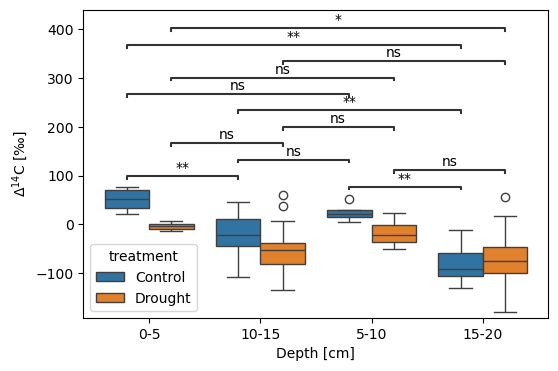

In [42]:
v='D'# F: F14C, D: D14C. A: D14C-D14Catm

if v=='F': vv=data.columns[2];tity='F$^{14}$C [-]'
if v=='D': vv=data.columns[4];tity='$\Delta^{14}$C [‰]'
if v=='A': vv=data.D; tity='$\Delta^{14}$C-$\Delta^{14}$C$_{atm}$ [‰]'

fig,axs=plt.subplots(figsize=[6,4])
treat=['Control','Drought']

pairs = [
    [('0-5', 'Control'), ('5-10', 'Control')],
    [('0-5', 'Control'), ('10-15', 'Control')],
    [('0-5', 'Control'), ('15-20', 'Control')],
    [('5-10', 'Control'), ('10-15', 'Control')],
    [('5-10', 'Control'), ('15-20', 'Control')],
    [('10-15', 'Control'), ('15-20', 'Control')],
    [('0-5', 'Drought'), ('5-10', 'Drought')],
    [('0-5', 'Drought'), ('10-15', 'Drought')],
    [('0-5', 'Drought'), ('15-20', 'Drought')],
    [('5-10', 'Drought'), ('10-15', 'Drought')],
    [('5-10', 'Drought'), ('15-20', 'Drought')],
    [('10-15', 'Drought'), ('15-20', 'Drought')],
]

depths=data.depth.unique()
states_palette=sns.color_palette("tab10", n_colors=2)
states_order=treat
subcat_order=depths
hue_plot_params = {
    'data':data,
    'x': "depth",
    'y': vv,
    "order": subcat_order,
    "hue": "treatment",
    "hue_order": states_order,
    "palette": states_palette
}

sns.boxplot(ax=axs, **hue_plot_params)
annotator = Annotator(axs, pairs, **hue_plot_params)
annotator.configure(test='Kruskal').apply_and_annotate()
axs.set_ylabel(tity);axs.set_xlabel('Depth [cm]')
##t-test_ind, t-test_welch, t-test_paired, Mann-Whitney, Mann-Whitney-gt, Mann-Whitney-ls, Levene*, Wilcoxon, Kruskal, Brunner-Munzel

### Roots

In [43]:
data=pd.read_excel('Data/LabResults/Solids_veg_roots_d14C.xlsx',header=30)

temp=re.compile("([a-zA-Z]+)([0-9]+)")
plot=np.empty(len(data),dtype=int); depth=['']*len(data); treat=['']*len(data)
for i in range(len(data)):
    b=data['Probe'][i].split('_')[1]
    plot[i]=temp.match(b).groups()[1]
    depth[i]=(data['Probe'][i].split('_')[-1]).split(' ')[1]
    if plot[i] in control: treat[i]='Control'
    if plot[i] in drought: treat[i]='Drought'
    
data['plot']=plot; data['depth']=depth; data['treatment']=treat 
depths=data.depth.unique()
w=depths[1]; depths[1]=depths[-1]; depths[3]=depths[2]; depths[2]=w
b=data[data.columns[4]]-D14C_atm # substract D14C atmospheric
data['D']=b
con=data[data['plot'].isin(control)] 
dro=data[data['plot'].isin(drought)] 

Roots=data

Text(0.5, 1.0, 'Drought')

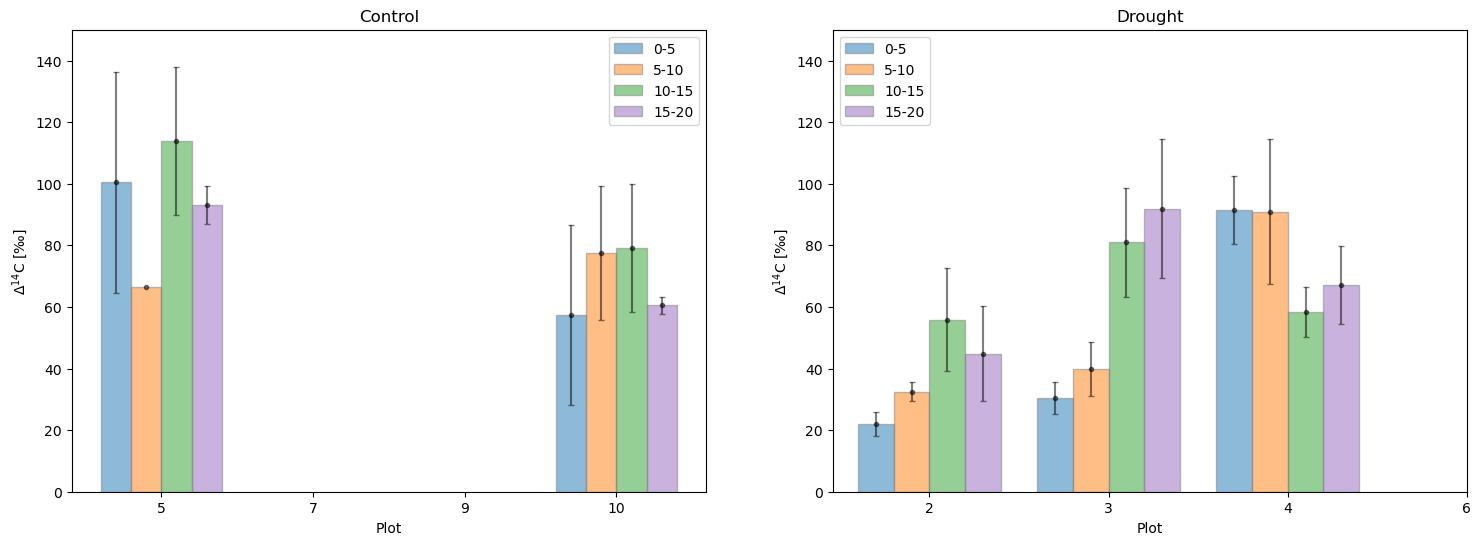

In [44]:
v='D'# F: F14C, D: D14C.

if v=='F': vv=data.columns[2];tity='F$^{14}$C [-]'; x1=1; x2=1.15
if v=='D': vv=data.columns[4];tity='$\Delta^{14}$C [‰]'; x1=0; x2=150 

fig,axs=plt.subplots(1,2,figsize=[18,6])
cmap=plt.cm.tab10
colors=cmap(np.linspace(0,1,8))

barWidth=0.20
br1=np.arange(len(depths))
br2=[x+barWidth for x in br1] 
br3=[x+barWidth for x in br2]
br4=[x+barWidth for x in br3]
br=[br1,br2,br3,br4]

res1=np.zeros([4,len(depths)])*np.nan; std1=np.zeros([4,len(depths)])*np.nan
res2=np.zeros([4,len(depths)])*np.nan; std2=np.zeros([4,len(depths)])*np.nan
for i in range(4):
    for j in range(len(depths)):
        w=con[(con['plot']==control[i])&(con['depth']==depths[j])]
        res1[i,j]=w[vv].mean();std1[i,j]=w[vv].std()/np.sqrt(len(w[~w[vv].isna()]))
        w=dro[(dro['plot']==drought[i])&(dro['depth']==depths[j])]
        res2[i,j]=w[vv].mean();std2[i,j]=w[vv].std()/np.sqrt(len(w[~w[vv].isna()]))

for i in range(len(depths)):
    axs[0].bar(br[i],res1[:,i],width=barWidth,edgecolor='grey',label=depths[i],color=colors[i],alpha=0.5) 
    axs[0].errorbar(br[i],res1[:,i],std1[:,i],fmt='.',color='Black',alpha=0.5,capsize=2)
    axs[1].bar(br[i],res2[:,i],width=barWidth,edgecolor='grey',label=depths[i],color=colors[i],alpha=0.5) 
    axs[1].errorbar(br[i],res2[:,i],std2[:,i],fmt='.',color='Black',alpha=0.5,capsize=2)

for i in range(2):
    axs[i].legend(); axs[i].set_ylabel(tity); axs[i].set_xlabel('Plot');axs[i].set_ylim(x1,x2)
    if v=='F':axs[i].axhline(1,color='gray',linestyle='--'); axs[1].axhline(1,color='gray',linestyle='--') 
axs[0].set_xticks([r+barWidth*1.5 for r in range(len(control))],control)
axs[1].set_xticks([r+barWidth*1.5 for r in range(len(drought))],drought)
axs[0].set_title('Control'); axs[1].set_title('Drought')

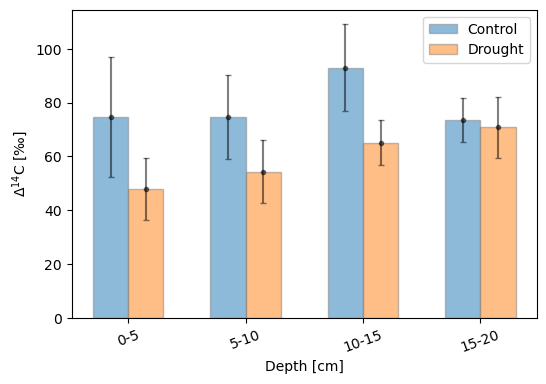

In [45]:
v='D'# F: F14C, D: D14C.

if v=='F': vv=data.columns[2];tity='F$^{14}$C [-]'
if v=='D': vv=data.columns[4];tity='$\Delta^{14}$C [‰]'

fig,axs=plt.subplots(figsize=[6,4])
cmap=plt.cm.tab10
colors=cmap(np.linspace(0,1,8))
treat=['Control','Drought']

barWidth=0.3
br=np.arange(4)
br2=[x+barWidth for x in br1] 
br=[br1,br2]

res=np.zeros([2,len(depths)])*np.nan; std=np.zeros([2,len(depths)])*np.nan
for j in range(len(depths)):
    w=con[con['depth']==depths[j]]
    res[0,j]=w[vv].mean();std[0,j]=w[vv].std()/np.sqrt(len(w[~w[vv].isna()]))
    w=dro[dro['depth']==depths[j]]
    res[1,j]=w[vv].mean();std[1,j]=w[vv].std()/np.sqrt(len(w[~w[vv].isna()]))
f14c[:,8:12]=res; f14c_sd[:,8:12]=std
for i in range(2):
    plt.bar(br[i],res[i,:],width=barWidth,edgecolor='grey',label=treat[i],color=colors[i],alpha=0.5) 
    plt.errorbar(br[i],res[i,:],std[i,:],fmt='.',color='Black',alpha=0.5,capsize=2)
plt.legend()
plt.xticks([r+barWidth/2 for r in range(len(depths))],depths,rotation=20)
plt.ylabel(tity);plt.xlabel('Depth [cm]')
if v=='F':plt.axhline(1,color='gray',linestyle='--')

##### statistic test

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

10-15_Control vs. 10-15_Drought: Kruskal-Wallis independent samples (pairwise between groups), P_val:1.252e-01 Stat=2.351e+00
0-5_Control vs. 0-5_Drought: Kruskal-Wallis independent samples (pairwise between groups), P_val:3.173e-01 Stat=1.000e+00
15-20_Control vs. 15-20_Drought: Kruskal-Wallis independent samples (pairwise between groups), P_val:7.697e-01 Stat=8.571e-02
5-10_Control vs. 5-10_Drought: Kruskal-Wallis independent samples (pairwise between groups), P_val:1.649e-01 Stat=1.929e+00


Text(0.5, 14.722222222222216, 'Depth [cm]')

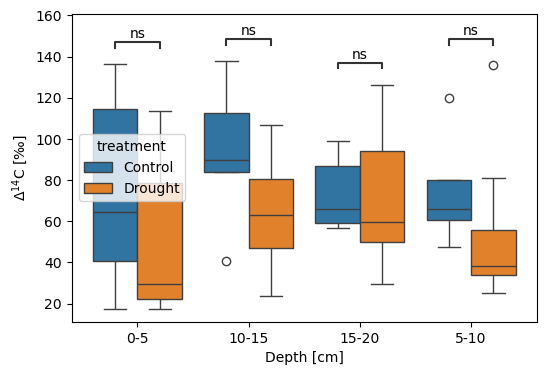

In [46]:
v='D'# F: F14C, D: D14C. A: D14C-D14Catm

if v=='F': vv=data.columns[2];tity='F$^{14}$C [-]'
if v=='D': vv=data.columns[4];tity='$\Delta^{14}$C [‰]'
if v=='A': vv=data.D; tity='$\Delta^{14}$C-$\Delta^{14}$C$_{atm}$ [‰]'

fig,axs=plt.subplots(figsize=[6,4])
treat=['Control','Drought']

pairs = [
    [('0-5', 'Control'), ('0-5', 'Drought')],
    [('5-10', 'Control'), ('5-10', 'Drought')],
    [('10-15', 'Control'), ('10-15', 'Drought')],
    [('15-20', 'Control'), ('15-20', 'Drought')],
]

depths=data.depth.unique()
states_palette=sns.color_palette("tab10", n_colors=2)
states_order=treat
subcat_order=depths
hue_plot_params = {
    'data':data,
    'x': "depth",
    'y': vv,
    "order": subcat_order,
    "hue": "treatment",
    "hue_order": states_order,
    "palette": states_palette
}

sns.boxplot(ax=axs, **hue_plot_params)
annotator = Annotator(axs, pairs, **hue_plot_params)
annotator.configure(test='Kruskal').apply_and_annotate()
axs.set_ylabel(tity);axs.set_xlabel('Depth [cm]')
##t-test_ind, t-test_welch, t-test_paired, Mann-Whitney, Mann-Whitney-gt, Mann-Whitney-ls, Levene*, Wilcoxon, Kruskal, Brunner-Munzel

In [49]:
# save results of statistical test.
_, results = annotator.apply_and_annotate()
stat_results=[result.data.pvalue for result in results]
w=np.array(stat_results)

temp=w[0];temp2=w[2]
w[0]=w[1]
w[1]=w[3]
w[2]=temp
w[3]=temp2

test[8:12]=w

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

10-15_Control vs. 10-15_Drought: Kruskal-Wallis independent samples (pairwise between groups), P_val:1.252e-01 Stat=2.351e+00
0-5_Control vs. 0-5_Drought: Kruskal-Wallis independent samples (pairwise between groups), P_val:3.173e-01 Stat=1.000e+00
15-20_Control vs. 15-20_Drought: Kruskal-Wallis independent samples (pairwise between groups), P_val:7.697e-01 Stat=8.571e-02
5-10_Control vs. 5-10_Drought: Kruskal-Wallis independent samples (pairwise between groups), P_val:1.649e-01 Stat=1.929e+00


<Figure size 640x480 with 0 Axes>

#### Comparisons between depths

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

15-20_Control vs. 5-10_Control: Levene test of variance, P_val:7.414e-01 Stat=1.179e-01
0-5_Control vs. 10-15_Control: Levene test of variance, P_val:4.209e-01 Stat=7.196e-01
10-15_Control vs. 15-20_Control: Levene test of variance, P_val:3.818e-01 Stat=8.565e-01
0-5_Drought vs. 10-15_Drought: Levene test of variance, P_val:6.262e-01 Stat=2.466e-01
15-20_Drought vs. 5-10_Drought: Levene test of variance, P_val:9.464e-01 Stat=4.680e-03
10-15_Drought vs. 15-20_Drought: Levene test of variance, P_val:6.722e-01 Stat=1.863e-01
10-15_Control vs. 5-10_Control: Levene test of variance, P_val:6.972e-01 Stat=1.645e-01
0-5_Control vs. 15-20_Control: Levene test of variance, P_val:1.092e-01 Stat=3.248e+00
0-5_Drought vs. 15-20_Drought: Levene test of variance, P_val:9.104e-01 Stat=1.309e-02
10-15_Drought vs. 

Text(0.5, 14.722222222222216, 'Depth [cm]')

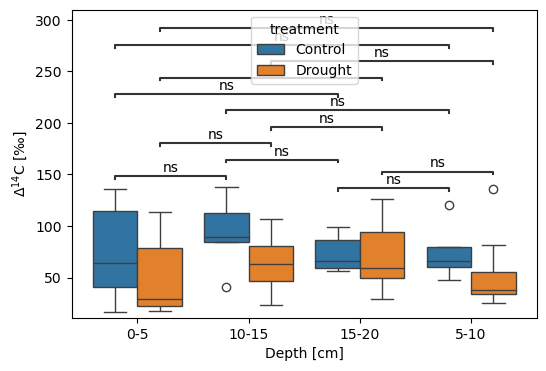

In [47]:
v='D'# F: F14C, D: D14C. A: D14C-D14Catm

if v=='F': vv=data.columns[2];tity='F$^{14}$C [-]'
if v=='D': vv=data.columns[4];tity='$\Delta^{14}$C [‰]'
if v=='A': vv=data.D; tity='$\Delta^{14}$C-$\Delta^{14}$C$_{atm}$ [‰]'

fig,axs=plt.subplots(figsize=[6,4])
treat=['Control','Drought']

pairs = [
    [('0-5', 'Control'), ('5-10', 'Control')],
    [('0-5', 'Control'), ('10-15', 'Control')],
    [('0-5', 'Control'), ('15-20', 'Control')],
    [('5-10', 'Control'), ('10-15', 'Control')],
    [('5-10', 'Control'), ('15-20', 'Control')],
    [('10-15', 'Control'), ('15-20', 'Control')],
    [('0-5', 'Drought'), ('5-10', 'Drought')],
    [('0-5', 'Drought'), ('10-15', 'Drought')],
    [('0-5', 'Drought'), ('15-20', 'Drought')],
    [('5-10', 'Drought'), ('10-15', 'Drought')],
    [('5-10', 'Drought'), ('15-20', 'Drought')],
    [('10-15', 'Drought'), ('15-20', 'Drought')],
]

depths=data.depth.unique()
states_palette=sns.color_palette("tab10", n_colors=2)
states_order=treat
subcat_order=depths
hue_plot_params = {
    'data':data,
    'x': "depth",
    'y': vv,
    "order": subcat_order,
    "hue": "treatment",
    "hue_order": states_order,
    "palette": states_palette
}

sns.boxplot(ax=axs, **hue_plot_params)
annotator = Annotator(axs, pairs, **hue_plot_params)
annotator.configure(test='Levene').apply_and_annotate()
axs.set_ylabel(tity);axs.set_xlabel('Depth [cm]')

### Wood, Foliage, Litter

In [48]:
data=pd.read_excel('Data/LabResults/Solids_veg_d14C.xlsx',header=31)
temp=re.compile("([a-zA-Z]+)([0-9]+)")
plot=np.empty(len(data),dtype=int); pool=['']*len(data); treat=['']*len(data)

for i in range(len(data)):
    b=data['Probe'][i].split('_')[1]
    plot[i]=temp.match(b).groups()[1]
    pool[i]=(data['Probe'][i].split('_')[2])
    if plot[i] in control: treat[i]='Control'
    if plot[i] in drought: treat[i]='Drought'
    
data['plot']=plot; data['pool']=pool; data['treatment']=treat 
poolsv=data.pool.unique(); poolsvnam=['Wood','Foliage','Fine litter','Coarse litter']
w=poolsv[0]; poolsv[0]=poolsv[3]; poolsv[3]=w; w=poolsv[1]; poolsv[1]=poolsv[2]; poolsv[2]=w
b=data[data.columns[4]]-D14C_atm # substract D14C atmospheric
data['D']=b

Veget=data

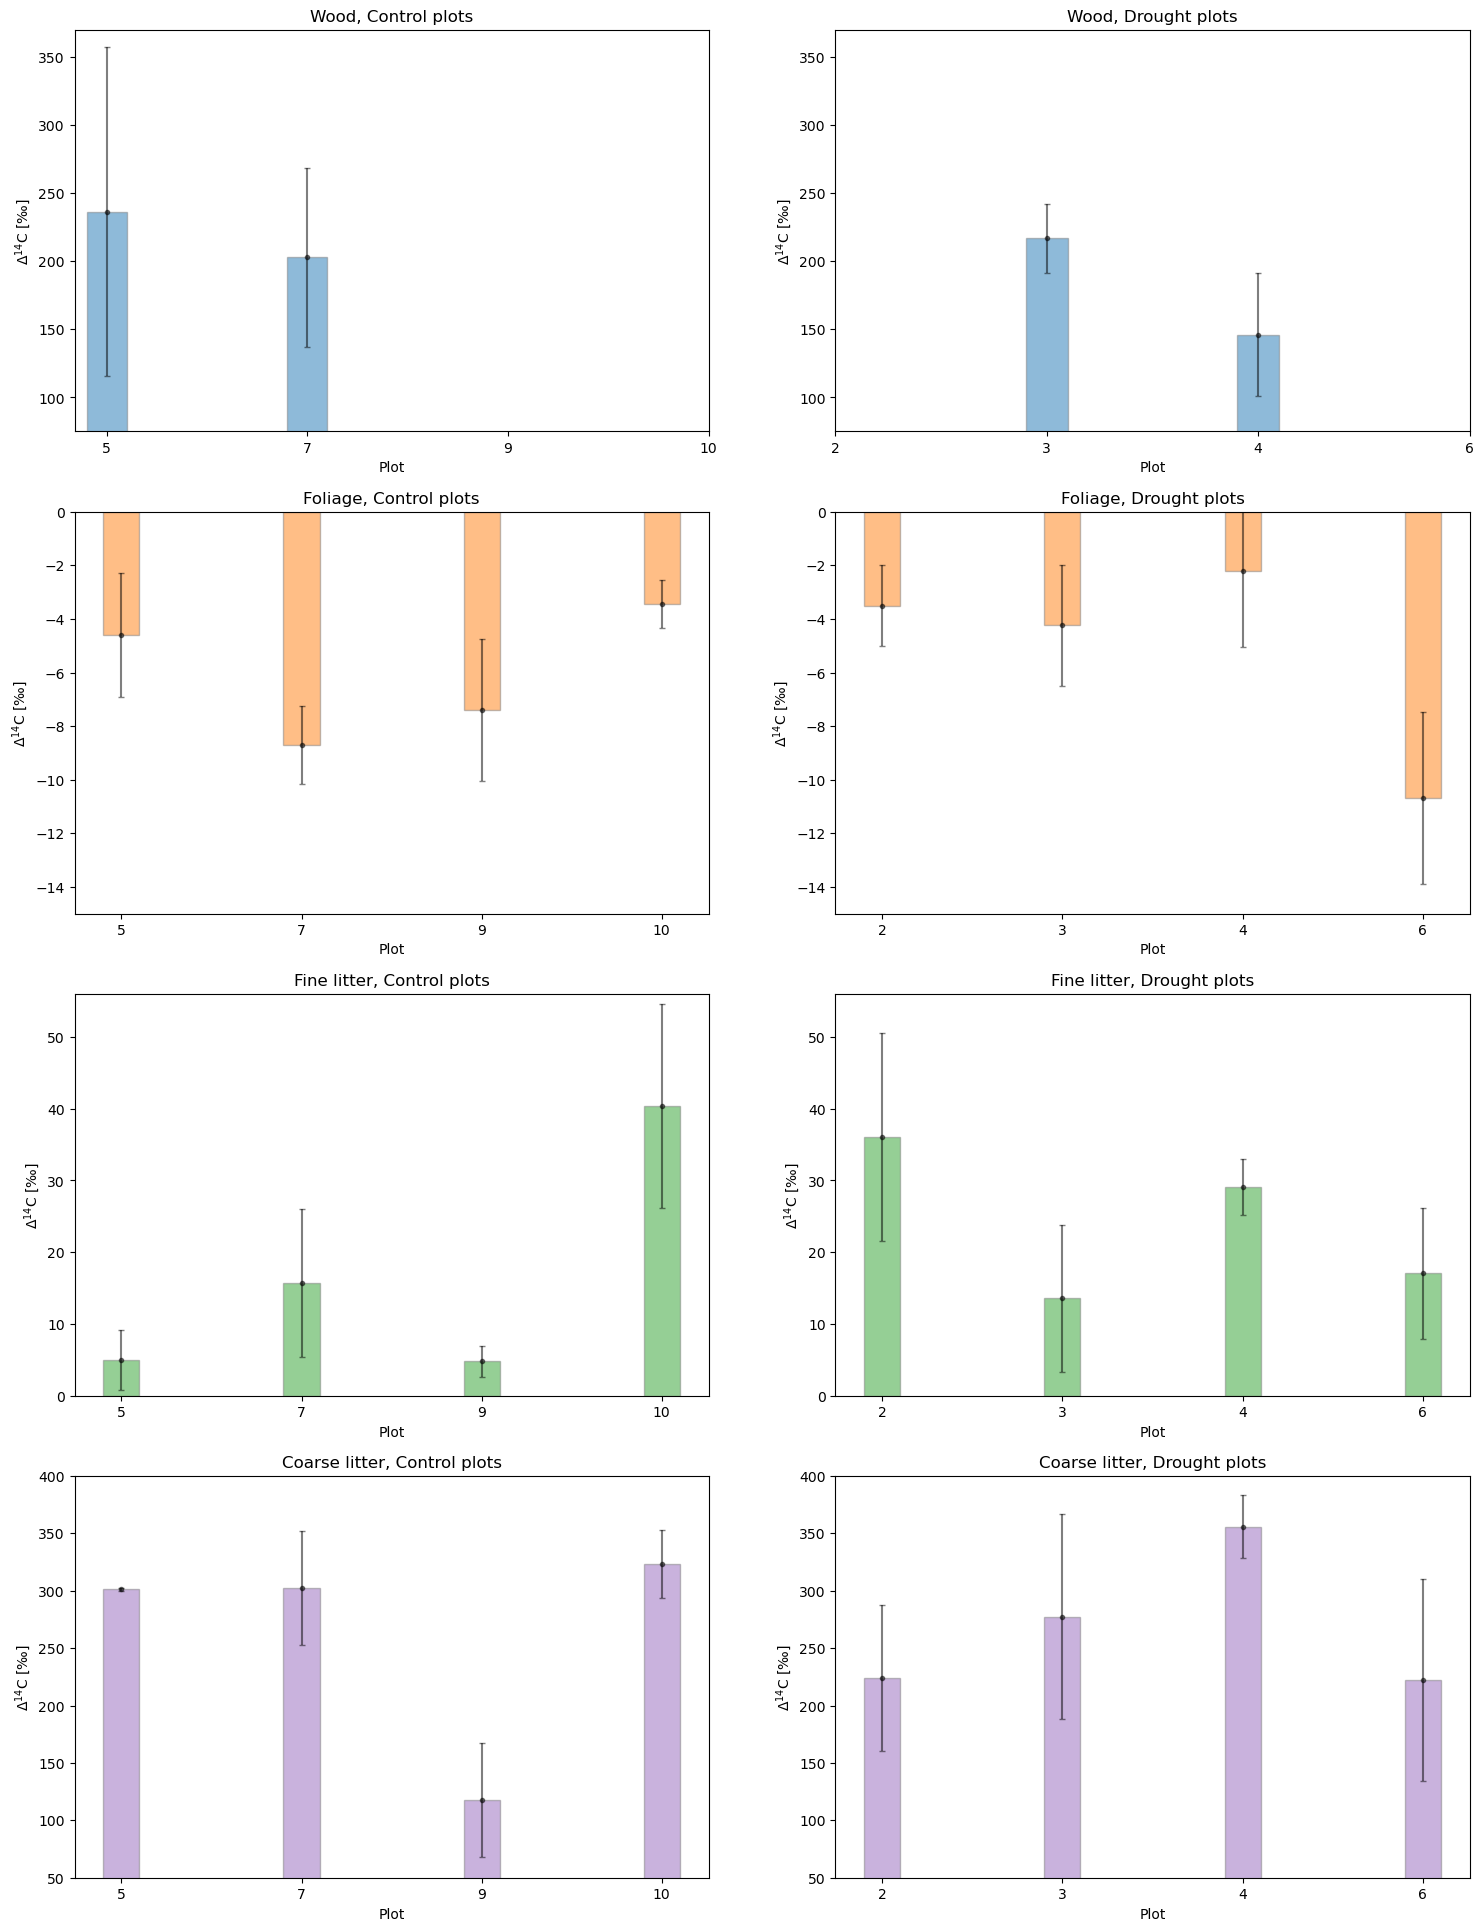

In [49]:
v='D'
if v=='F': vv=data.columns[2];tity='F$^{14}$C [-]'; x1=[1.1,0.99,1,1]; x2=[1.4,1.01,1.07,1.4]
if v=='D': vv=data.columns[4];tity='$\Delta^{14}$C [‰]';x1=[75,-15,0,50]; x2=[370,0,56,400]

fig,axs=plt.subplots(4,2,figsize=[18,24])
cmap=plt.cm.tab10
colors=cmap(np.linspace(0,1,8))
barWidth=0.20
treat=['Control','Drought']
br=np.arange(4)

for i in range(len(poolsv)): # pools
    v1=data[data['pool']==poolsv[i]]
    res=np.zeros([4,2])*np.nan; std=np.zeros([4,2])*np.nan
    for j in range(2): # treatment
        v2=v1[v1['treatment']==treat[j]]
        if j==0: plots=control
        if j==1: plots=drought
        for k in range(len(plots)):
            v3=v2[v2['plot']==plots[k]]
            res[k,j]=v3[vv].mean();std[k,j]=v3[vv].std()/np.sqrt(len(v3[vv][~v3[vv].isna()]))
        

        axs[i,j].bar(br,res[:,j],width=barWidth,edgecolor='grey',color=colors[i],alpha=0.5)   
        axs[i,j].errorbar(br,res[:,j],std[:,j],fmt='.',color='Black',alpha=0.5,capsize=2)
        axs[i,j].set_ylabel(tity); axs[i,j].set_xlabel('Plot'); axs[i,j].set_ylim(x1[i],x2[i])
        axs[i,j].set_title(poolsvnam[i]+', '+ treat[j]+' plots')

    axs[i,0].set_xticks([r for r in range(len(control))],control)
    axs[i,1].set_xticks([r for r in range(len(drought))],drought)

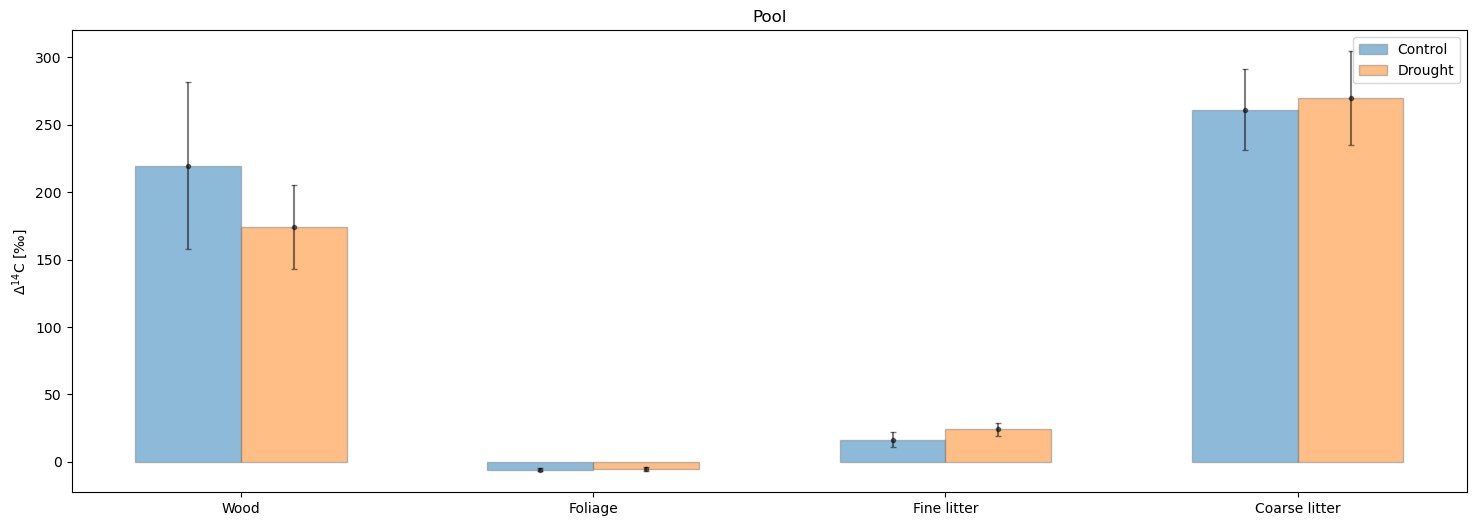

In [50]:
v='D'
if v=='F': vv=data.columns[2];tity='F$^{14}$C [-]'
if v=='D': vv=data.columns[4];tity='$\Delta^{14}$C [‰]'

fig,axs=plt.subplots(1,figsize=[18,6])
cmap=plt.cm.tab10
colors=cmap(np.linspace(0,1,8))
barWidth=0.20
barWidth=0.3
br1=np.arange(4)
br2=[x+barWidth for x in br1] 
br=[br1,br2]

res=np.zeros([4,2])*np.nan; std=np.zeros([4,2])*np.nan
for i in range(len(poolsv)): # pools
    v1=data[data['pool']==poolsv[i]]
    for j in range(2): # treatment
        v2=v1[v1['treatment']==treat[j]]
        res[i,j]=v2[vv].mean();std[i,j]=v2[vv].std()/np.sqrt(len(v2[vv][~v2[vv].isna()]))
    
for j in range(2):
    axs.bar(br[j],res[:,j],width=barWidth,edgecolor='grey',label=treat[j],color=colors[j],alpha=0.5) 
    axs.errorbar(br[j],res[:,j],std[:,j],fmt='.',color='Black',alpha=0.5,capsize=2)
           
axs.legend()
axs.set_xticks([r+barWidth/2 for r in range(4)],poolsvnam)
axs.set_ylabel(tity)
axs.set_title('Pool')
f14c[:,4:8]=res.T; f14c_sd[:,4:8]=std.T


##### statistical test

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

FO_Control vs. FO_Drought: Kruskal-Wallis independent samples (pairwise between groups), P_val:4.524e-01 Stat=5.646e-01
W_Control vs. W_Drought: Kruskal-Wallis independent samples (pairwise between groups), P_val:8.551e-01 Stat=3.333e-02
FL_Control vs. FL_Drought: Kruskal-Wallis independent samples (pairwise between groups), P_val:3.407e-01 Stat=9.079e-01
CL_Control vs. CL_Drought: Kruskal-Wallis independent samples (pairwise between groups), P_val:7.290e-01 Stat=1.200e-01


Text(0.5, 36.72222222222221, 'Pool')

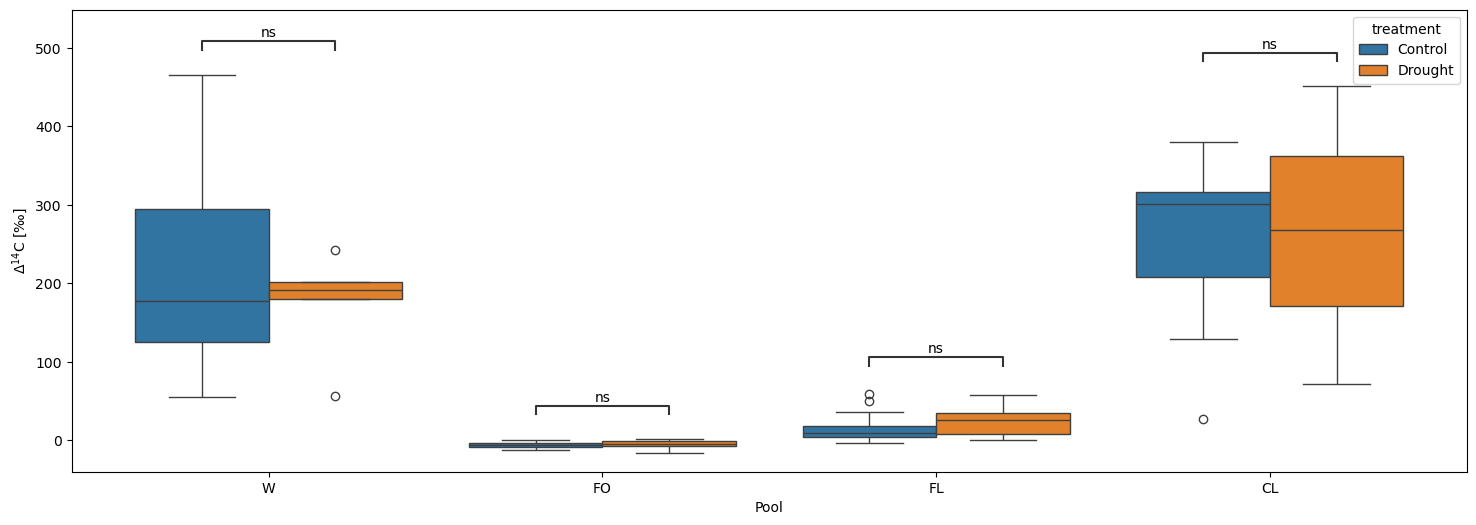

In [51]:
v='D'
if v=='F': vv=data.columns[2];tity='F$^{14}$C [-]'; x1=[1.1,0.99,1,1]; x2=[1.4,1.01,1.07,1.4]
if v=='D': vv=data.columns[4];tity='$\Delta^{14}$C [‰]';x1=[75,-15,0,50]; x2=[370,0,56,400]

fig,axs=plt.subplots(1,figsize=[18,6])
treat=['Control','Drought']

pairs = [
    [('W', 'Control'), ('W', 'Drought')],
    [('FO', 'Control'), ('FO', 'Drought')],
    [('FL', 'Control'), ('FL', 'Drought')],
    [('CL', 'Control'), ('CL', 'Drought')]
]

states_palette=sns.color_palette("tab10", n_colors=2)
states_order=treat
subcat_order=['W','FO','FL','CL']
hue_plot_params = {
    'data': data,
    'x': "pool",
    'y': vv,
    "order": subcat_order,
    "hue": "treatment",
    "hue_order": states_order,
    "palette": states_palette
}

sns.boxplot(ax=axs,**hue_plot_params)
annotator=Annotator(axs,pairs,**hue_plot_params)
annotator.configure(test='Kruskal').apply_and_annotate()
axs.set_ylabel(tity);axs.set_xlabel('Pool')

##t-test_ind, t-test_welch, t-test_paired, Mann-Whitney, Mann-Whitney-gt, Mann-Whitney-ls, Levene*, Wilcoxon, Kruskal, Brunner-Munzel

In [52]:
# save results of statistical test.
_, results = annotator.apply_and_annotate()
stat_results=[result.data.pvalue for result in results]
w=np.array(stat_results)
temp=w[0]
w[0]=w[1]
w[1]=temp
test[4:8]=w

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

FO_Control vs. FO_Drought: Kruskal-Wallis independent samples (pairwise between groups), P_val:4.524e-01 Stat=5.646e-01
W_Control vs. W_Drought: Kruskal-Wallis independent samples (pairwise between groups), P_val:8.551e-01 Stat=3.333e-02
FL_Control vs. FL_Drought: Kruskal-Wallis independent samples (pairwise between groups), P_val:3.407e-01 Stat=9.079e-01
CL_Control vs. CL_Drought: Kruskal-Wallis independent samples (pairwise between groups), P_val:7.290e-01 Stat=1.200e-01


<Figure size 640x480 with 0 Axes>

#### Differences between vegetation pools

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

FL_Control vs. CL_Control: Kruskal-Wallis independent samples (pairwise between groups), P_val:6.785e-05 Stat=1.587e+01
W_Control vs. FO_Control: Kruskal-Wallis independent samples (pairwise between groups), P_val:7.470e-04 Stat=1.137e+01
FO_Control vs. FL_Control: Kruskal-Wallis independent samples (pairwise between groups), P_val:6.785e-05 Stat=1.587e+01
W_Drought vs. FO_Drought: Kruskal-Wallis independent samples (pairwise between groups), P_val:1.545e-03 Stat=1.002e+01
FL_Drought vs. CL_Drought: Kruskal-Wallis independent samples (pairwise between groups), P_val:3.226e-05 Stat=1.728e+01
FO_Drought vs. FL_Drought: Kruskal-Wallis independent samples (pairwise between groups), P_val:5.272e-05 Stat=1.635e+01
FO_Control vs. CL_Control: Kruskal-Wallis independent samples (pairwise between groups), P

Text(0.5, 36.72222222222221, 'Pool')

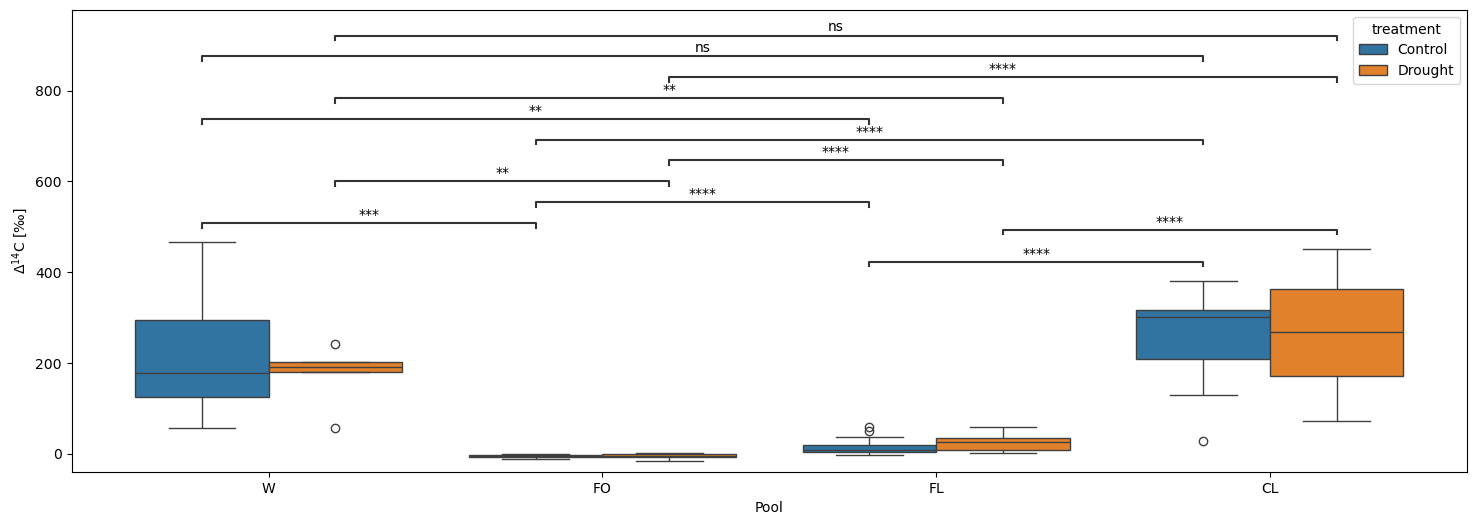

In [53]:
v='D'
if v=='F': vv=data.columns[2];tity='F$^{14}$C [-]'; x1=[1.1,0.99,1,1]; x2=[1.4,1.01,1.07,1.4]
if v=='D': vv=data.columns[4];tity='$\Delta^{14}$C [‰]';x1=[75,-15,0,50]; x2=[370,0,56,400]

fig,axs=plt.subplots(1,figsize=[18,6])
treat=['Control','Drought']

pairs = [
    [('W', 'Control'), ('FO', 'Control')],
    [('W', 'Control'), ('FL', 'Control')],
    [('W', 'Control'), ('CL', 'Control')],
    [('FO', 'Control'), ('FL', 'Control')],
    [('FO', 'Control'), ('CL', 'Control')],
    [('FL', 'Control'), ('CL', 'Control')],
    [('W', 'Drought'), ('FO', 'Drought')],
    [('W', 'Drought'), ('FL', 'Drought')],
    [('W', 'Drought'), ('CL', 'Drought')],
    [('FO', 'Drought'), ('FL', 'Drought')],
    [('FO', 'Drought'), ('CL', 'Drought')],
    [('FL', 'Drought'), ('CL', 'Drought')]
]

states_palette=sns.color_palette("tab10", n_colors=2)
states_order=treat
subcat_order=['W','FO','FL','CL']
hue_plot_params = {
    'data': data,
    'x': "pool",
    'y': vv,
    "order": subcat_order,
    "hue": "treatment",
    "hue_order": states_order,
    "palette": states_palette
}

sns.boxplot(ax=axs,**hue_plot_params)
annotator=Annotator(axs,pairs,**hue_plot_params)
annotator.configure(test='Kruskal').apply_and_annotate()
axs.set_ylabel(tity);axs.set_xlabel('Pool')

### Resume $^{14}$C

In [124]:
data.columns[4]

'∆14C  (‰)'

In [54]:
treat=['Control','Drought']
# ER from Miller-Tans
#ER=pd.read_csv('Data/F14C_slopes_ER.csv') # read values generated in Miller_Tans_Prades.ipynb.
# ERs1=pd.DataFrame(columns=Veget1.columns); ERs2=pd.DataFrame(columns=Veget1.columns)
# ER1=np.random.choice(ER.Control,50);ER2=np.random.choice(ER.Drought,50)# consider only 50 random values.
# b=stats.kruskal(ERs1,ERs2)
# test[0]=b[1]

# ERs1[ERs1.columns[0]]=ER1; ERs2[ERs2.columns[0]]=ER2
# ERs1[ERs1.columns[1]]=fm_D14C(ER1,2024); ERs2[ERs2.columns[1]]=fm_D14C(ER2,2024)
# ERs1[ERs1.columns[2]]=['ER']*(len(ER1)); ERs2[ERs2.columns[2]]=['ER']*(len(ER2))
# ERs1[ERs1.columns[3]]=['Control']*(len(ER1)); ERs2[ERs2.columns[3]]=['Drought']*(len(ER2))
# ERs1[ERs1.columns[4]]=ERs1[ERs1.columns[1]]-D14C_atm; ERs2[ERs2.columns[4]]=ERs2[ERs2.columns[1]]-D14C_atm
# ERs=pd.concat([ERs1,ERs2], ignore_index=True, sort=False) # Ecosystem respiration

# ************************************
# ER from the balance

ERc=pd.read_csv('Data/D14CER_mean_Control.csv') # read values generated in Ecosytem_respiration.ipynb (balance).
ERd=pd.read_csv('Data/D14CER_mean_Drought.csv')

for i in range(2):
    if i==0:df=ERc
    if i==1:df=ERd

    merged_series=pd.concat([df[col] for col in df.columns], ignore_index=True)
    F14C=D14C_fm(merged_series,2024)
    ERw=pd.DataFrame({'F14C':F14C,data.columns[4]: merged_series})
    ERw['pool']=['ER']*(len(ERw)); ERw['treatment']=[treat[i]]*(len(ERw))
    ERw['D']=ERw[ERw.columns[1]]-D14C_atm
    if i==0:ERc=ERw
    if i==1:ERd=ERw
ERs=pd.concat([ERd,ERc],ignore_index=True, sort=False) # Ecosystem respiration
b=stats.kruskal(ERc[ERc.columns[1]],ERd[ERd.columns[1]])
test[0]=b[1]

KruskalResult(statistic=6.564102564102569, pvalue=0.010405619868873535)

In [55]:
v=ERc[ERc.columns[0]]
#v=v.dropna(subset=['F14C'])

v.shape
print(v.mean(), v.std(), v.min(), v.max(), stats.ttest_1samp(v, D14C_atm))
#print(v[con.columns[4]].mean(), v[con.columns[4]].std(), v[con.columns[4]].min(), v[con.columns[4]].max(), stats.ttest_1samp(v[con.columns[4]], D14C_atm))

1.003185146928171 0.0008873734756558392 1.0018709520390414 1.0042444461013216 Ttest_1sampResult(statistic=18613.283542065554, pvalue=8.495498794639967e-21)


In [56]:
#merge all data in the same dataframe to facilitate plotting

# Vegetation pools.
Veget1=Veget[Veget.columns[[2,4,8,9,10]]] 
Veget1=Veget1.sort_values('pool', ascending=False)
# Field soil respiration.
a=['FFSR']*(len(FFSR))
FFSR['pool']=a
FFSR1=FFSR[FFSR.columns[[2,4,18,16,17]]]
FFSR1=FFSR1[FFSR1[FFSR1.columns[1]]>-300] 
# Incubated soil respiration.
a=['Soil inc.']*(len(Soil_inc))
Soil_inc['pool']=a
Soil_inc1=Soil_inc[Soil_inc.columns[[2,4,11,9,10,8]]]
#Soil_inc1=Soil_inc[Soil_inc.columns[[2,4,12,9,10,8]]] 
# Solid soils.
a=['Soil']*(len(Soil_solid))
Soil_solid['pool']=a
Soil_solid1=Soil_solid[Soil_solid.columns[[2,4,11,9,10,8]]] 
Soil_solid1['depth']=pd.Categorical(Soil_solid1['depth'], ["0-5", "5-10", "10-15", "15-20"])
Soil_solid1=Soil_solid1.sort_values("depth")
# Roots
a=['Roots']*(len(Roots))
Roots['pool']=a
Roots1=Roots[Roots.columns[[2,4,11,9,10,8]]] 
Roots1['depth']=pd.Categorical(Roots1['depth'], ["0-5", "5-10", "10-15", "15-20"])
Roots1=Roots1.sort_values("depth")

# Concatenate all data
allD=pd.concat([ERs,FFSR1,Soil_inc1,Veget1,Roots1,Soil_solid1], ignore_index=True, sort=False) 

# Name of subgroups
b=['']*(len(allD))
allD['pool2']=b
b=['']*(len(allD))
allD['pool3']=b

allD['pool2'].loc[allD['depth'].isnull()]=allD['pool'].loc[allD['depth'].isnull()]
allD['pool2'].loc[allD['depth'].notnull()]=allD.loc[allD.depth.notnull()].pool+'\n'+allD.loc[allD.depth.notnull()].depth.astype('object')
allD.pool2.iloc[allD.pool2=='W']='Wood'; allD.pool.iloc[allD.pool=='W']='Vegetation'
allD.pool2.iloc[allD.pool2=='FO']='Foliage'; allD.pool.iloc[allD.pool=='FO']='Vegetation'
allD.pool2.iloc[allD.pool2=='FL']='Fine \nLitter'; allD.pool.iloc[allD.pool=='FL']='Vegetation'
allD.pool2.iloc[allD.pool2=='CL']='Coarse \nLitter'; allD.pool.iloc[allD.pool=='CL']='Vegetation'

/tmp/ipykernel_25954/11469598.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Soil_solid1['depth']=pd.Categorical(Soil_solid1['depth'], ["0-5", "5-10", "10-15", "15-20"])
/tmp/ipykernel_25954/11469598.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Roots1['depth']=pd.Categorical(Roots1['depth'], ["0-5", "5-10", "10-15", "15-20"])
/tmp/ipykernel_25954/11469598.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: htt

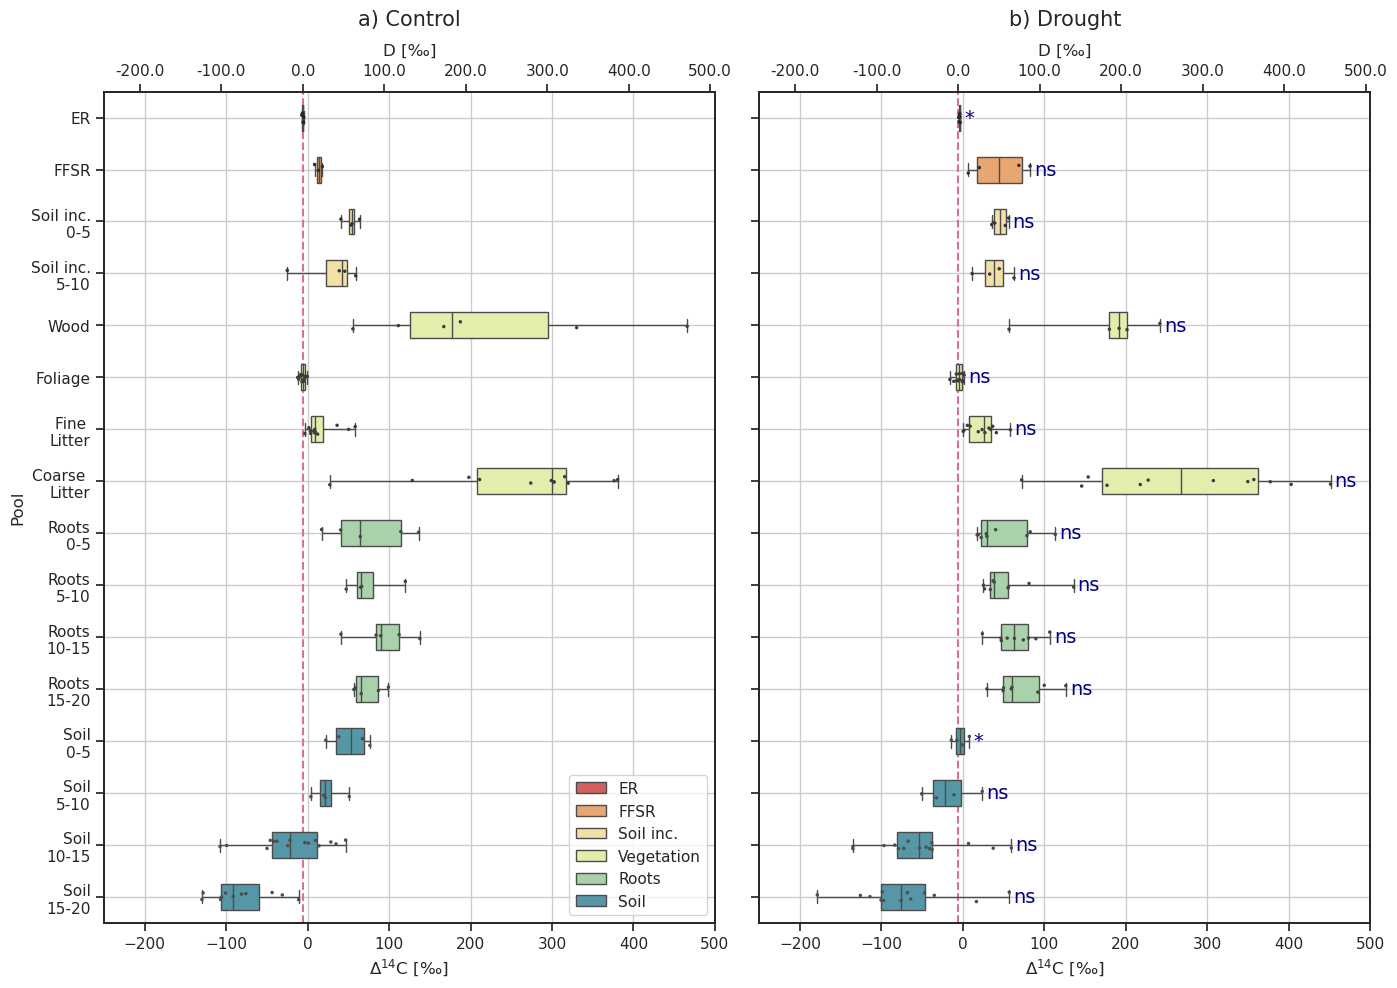

In [58]:
treat=['Control','Drought']
pp=['a)','b)']
sns.set_theme(style="ticks")
fig,ax=plt.subplots(1,2,figsize=(10*np.sqrt(2),10))
ax[0].axvline(x=D14C_atm,color='palevioletred',linestyle='dashed')
ax[1].axvline(x=D14C_atm,color='palevioletred',linestyle='dashed')

cmap=plt.cm.tab10
colors=cmap(np.linspace(0,1,16))
for i in range(2):
    sns.boxplot(allD[allD['treatment']==treat[i]],x=allD.columns[1],y="pool2",hue='pool',
                whis=[0,100],ax=ax[i],width=.5,palette='Spectral')  
    sns.stripplot(allD[allD['treatment']==treat[i]],x=allD.columns[1],y="pool2",hue='pool',
                  size=2.5,palette='dark:.3',ax=ax[i])    
    ax[i].set_xlim(-250,500)
    # add p value              
    if i==1:
        medians=allD[allD['treatment']==treat[i]].groupby(['pool2'],sort=False)[allD.columns[1]].max()
        pos=range(len(medians))
        for tick,label in zip(pos,ax[i].get_yticklabels()):
#             print(tick)
            ax[i].text(medians[tick]+5,tick+0.1,p_value(test[tick]),color='navy',size=14)      
    ax[i].set_xlabel('$\Delta^{14}$C [‰]')

    ax[i].yaxis.grid(True); ax[i].xaxis.grid(True)
    handles,labels = ax[i].get_legend_handles_labels()
    ax[i].legend(handles[:6],labels[:6], loc='lower right')
    
    ax2=ax[i].twiny()
    ax2.set_xticks(ax[i].get_xticks()+D14C_atm)
    ax2.set_xbound(ax[i].get_xbound())
    ax2.set_xticklabels([x for x in ax[i].get_xticks()])
    ax2.set_title("D [‰]")
    plt.text(0.5, 1.08, pp[i]+' '+treat[i],
         horizontalalignment='center',
         fontsize=15,
         transform = ax[i].transAxes)

ax[1].get_legend().set_visible(False)
ax[0].set_ylabel('Pool')
plt.setp(ax[1].get_yticklabels(),visible=False)

# # #ax[0].spines[['right']].set_visible(False)
# # #ax[1].spines[['left']].set_visible(False)
ax[1].set(ylabel=None)

plt.subplots_adjust(wspace=0.1)
plt.tight_layout()
fig.savefig('Figures/Data_field/14C_allpools_Prades.pdf')

In [53]:
allD[allD.pool=='ER'][allD.treatment=='Drought'].D.mean()

/tmp/ipykernel_25359/3970469958.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  allD[allD.pool=='ER'][allD.treatment=='Drought'].D.mean()


7.208363443605428

### Temporal scales figure

In [57]:
F14Cc=pd.read_csv('Data/D14Catm/NHZ1_data_forecast.csv')
F14Cc['D14C']=fm_D14C(F14Cc['F14C'],F14Cc['time'])
minmax=pd.DataFrame(columns=['pool','min_control','max_control','min_drought','max_drought']) # min and max values of D14C.

minmax['pool']=allD['pool2'].unique()
for i in range(2):
    minmax[minmax.columns[i*2+1]]=allD[allD['treatment']==treat[i]].groupby(['pool2'],sort=False)[allD.columns[1]].min().values
    minmax[minmax.columns[i*2+2]]=allD[allD['treatment']==treat[i]].groupby(['pool2'],sort=False)[allD.columns[1]].max().values

minmax.loc[3,'min_control']=38.9   
  
minmaxt=minmax.copy() # times associated to those values

for i in range(4):
    vv=np.zeros(minmax.shape[0])
    val=minmax[minmax.columns[i+1]]
    for j in range(minmax.shape[0]):
        vv[j]=find_closest_value(F14Cc,'D14C','time',val[j])[1]
    minmaxt[minmaxt.columns[i+1]]=vv
    
# Correction of values
F14C2=F14Cc[F14Cc.time>1970] # only the descending part of the curve.
minmaxt.loc[0,'min_drought']=2024
minmaxt.loc[0,'max_control']=2024
minmaxt.loc[0,'min_control']=2023
minmaxt.loc[1,'min_control']=find_closest_value(F14C2,'D14C','time',minmax.loc[1,'min_control'])[1]
minmaxt.loc[3,'max_control']=find_closest_value(F14C2,'D14C','time',minmax.loc[1,'max_control'])[1]
minmaxt.loc[5,'min_drought']=2024
minmaxt.loc[10,'max_control']=find_closest_value(F14C2,'D14C','time',minmax.loc[10,'max_control'])[1]
minmaxt.loc[12,'min_control']=find_closest_value(F14C2,'D14C','time',minmax.loc[12,'min_control'])[1]
minmaxt.loc[14,'max_drought']=find_closest_value(F14C2,'D14C','time',minmax.loc[14,'max_drought'])[1]

/tmp/ipykernel_25954/2565591703.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['difference']=abs(df[target_col]-target_value)
/tmp/ipykernel_25954/2565591703.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['difference'], inplace=True)
/tmp/ipykernel_25954/2565591703.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

In [58]:
minmaxt

,pool,min_control,max_control,min_drought,max_drought
0,ER,2023.00,2024.00,2024.00,2018.50
1,FFSR,2015.50,2013.00,2015.25,1999.25
2,Soil inc.\n0-5,2008.50,2003.50,2009.75,2004.75
3,Soil inc.\n5-10,2008.75,2013.00,2013.25,2003.75
4,Wood,2004.75,1972.75,2004.50,1961.50
5,Foliage,2021.25,2017.00,2024.00,2016.25
6,Fine \nLitter,2018.50,2004.00,2018.00,2004.00
7,Coarse \nLitter,2011.25,1975.75,2002.00,1973.50
8,Roots\n0-5,2013.50,1991.75,2013.00,1994.75
9,Roots\n5-10,2006.00,1993.25,2011.50,1991.75


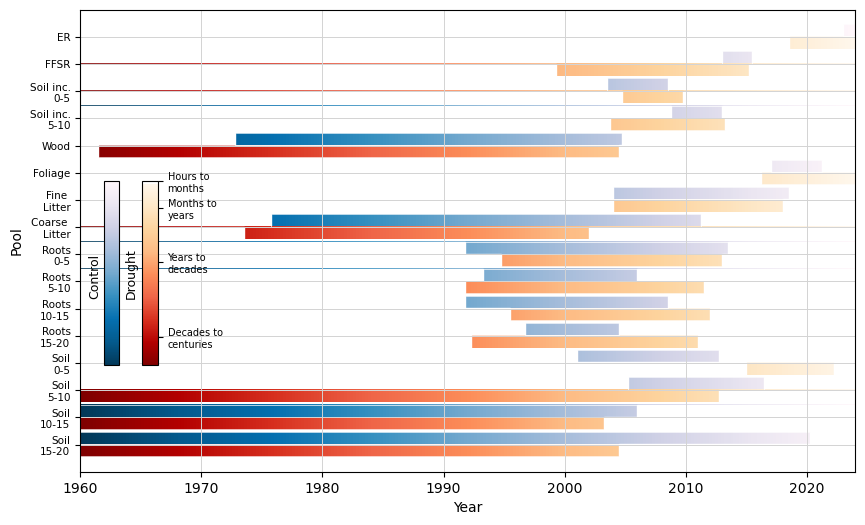

In [130]:
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.patches import Rectangle
from matplotlib.colors import LinearSegmentedColormap, Normalize
from matplotlib.colorbar import ColorbarBase
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.patches import Patch
fig,ax=plt.subplots(1,figsize=(10,6))
# F14Cc=pd.read_csv('Data/D14Catm/NHZ1_data_forecast.csv')
# F14Cc['D14C']=fm_D14C(F14Cc['F14C'],F14Cc['time'])
# plt.plot(F14Cc.time,F14Cc.D14C,c='black')
cmap1=plt.cm.PuBu_r
cmap2=plt.cm.OrRd_r

# plt.ylabel(r'$\Delta^{14}$C [‰]')
df=minmaxt#.loc[0:2]
bar_height=0.45
y_pos = np.arange(len(df))

year_min,year_max=1960, 2024

def barra_degradada_global(ax, x0, x1, y, height, cmap, year_min, year_max,edgecolor, linewidth=0.5):
    n = 500  # resolución del degradado
    # El degradado siempre cubre el rango global, pero solo se muestra el segmento de la barra
    Z = np.linspace(0, 1, n).reshape(1, -1)
    extent = [year_min,year_max,y-height/2, y + height/2]
    ax.imshow(Z, extent=extent, aspect='auto', cmap=cmap, zorder=0)
    # Cubre fuera del rango de la barra con blanco (opcional, para limpiar)
    if x0 > year_min:
        ax.add_patch(plt.Rectangle((year_min,y-height/2-0.02), x0 - year_min, height, color='white', zorder=0))
    if x1 < year_max:
        ax.add_patch(plt.Rectangle((x1,y-height/2-0.02), year_max - x1, height,color='white', zorder=0))
    ax.add_patch(Rectangle((x0, y - height/2-0.02), x1 - x0, height, 
                           fill=False, edgecolor=edgecolor, linewidth=linewidth, zorder=1))

for i, row in df.iterrows():
   # Control 
    barra_degradada_global(
        ax,
        min([row['min_control'],row['max_control']]),
        max([row['min_control'],row['max_control']]),
        y_pos[i] - bar_height/2,
        bar_height,
        cmap1,
        year_min,
        year_max,
        edgecolor='white'
    )
    # Drought
    barra_degradada_global(
        ax,
        min([row['min_drought'],row['max_drought']]),
        max([row['min_drought'],row['max_drought']]),
        y_pos[i]+ bar_height/2,
        bar_height,
        cmap2,
        year_min,
        year_max,
        edgecolor='white'
    )


ax.set_yticks(y_pos)
ax.set_yticklabels(df['pool'],fontsize=7.5)
ax.set_xlim(year_min, year_max)
ax.set_ylim(y_pos[0]-1, y_pos[-1]+1)
ax.invert_yaxis()
ax.set_xlabel('Year')
ax.set_ylabel('Pool')
ax.grid(axis='y', color='lightgray', linestyle='-', linewidth=0.7) 
ax.grid(axis='x', color='lightgray', linestyle='-', linewidth=0.7) 


# treatment legend
# legend_elements = [
#     Patch(facecolor=cmap1, edgecolor='steelblue', label='Control', linewidth=0.5),
#     Patch(facecolor=cmap2, edgecolor='maroon', label='Drought', linewidth=0.5)
# ]

#ax.legend(handles=legend_elements, loc='upper left')

# vertical colorbar 
norm = Normalize(vmin=year_min, vmax=year_max)
cax = inset_axes(
    ax,
    width="2%",          # ancho relativo al eje ax
    height="40%",        # alto relativo al eje ax
    loc='center left',   # posición relativa (puedes usar: 'center right', 'upper right', etc.)
    bbox_to_anchor=(0.03,-0.07, 1, 1),  # mueve la barra justo a la derecha del ax
    bbox_transform=ax.transAxes,
    borderpad=0
)

cax2 = inset_axes(
    ax,
    width="2%",          # ancho relativo al eje ax
    height="40%",        # alto relativo al eje ax
    loc='center left',   # posición relativa (puedes usar: 'center right', 'upper right', etc.)
    bbox_to_anchor=(0.08,-0.07, 1, 1),  # mueve la barra justo a la derecha del ax
    bbox_transform=ax.transAxes,
    borderpad=0
)

cb2=ColorbarBase(cax, cmap=cmap1, norm=norm, orientation='vertical')
cb=ColorbarBase(cax2, cmap=cmap2, norm=norm, orientation='vertical')
cb2.set_ticks([])

bounds=[1960,1980,2013,2018,2024]
labels=['Decades to \ncenturies','Years to \ndecades', 'Months to \nyears', 'Hours to \nmonths']

tick_positions=[(bounds[i] + bounds[i+1]) / 2 for i in range(len(bounds)-1)]
tick_positions[-1]=2025

cb.set_ticks(tick_positions)
cb.set_ticklabels(labels,fontsize=7)

ax.annotate('Control',xy=(0.01,0.38), xycoords=ax.transAxes,fontsize=9,rotation=90)
ax.annotate('Drought',xy=(0.057,0.38), xycoords=ax.transAxes,fontsize=9,rotation=90)

fig.savefig('Figures/Data_field/Temporal_scales_all.pdf')

In [82]:
tick_positions

[1970.0, 1996.5, 2018.0, 2023.5]

In [5]:
F14Cc=pd.read_csv('Data/D14Catm/NHZ1_data_forecast.csv')
F14Cc['D14C']=fm_D14C(F14Cc['F14C'],F14Cc['time'])

Text(0, 0.5, '$\\Delta^{14}$C [‰]')

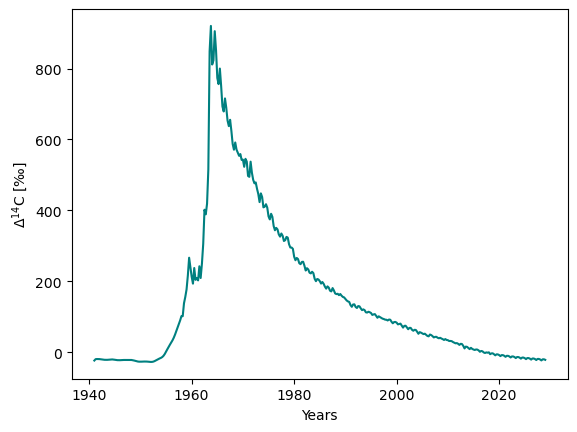

In [13]:
plt.plot(F14Cc.time,F14Cc.D14C,color='teal')
plt.xlabel('Years')
plt.ylabel(r'$\Delta^{14}$C [‰]')

### Results

#### Pools

<u> <b>Vegetation</b> </u>
- Δ14C from foliage shows low positive D close to equilibrium with the atmospheric 14C concentration. --> this pool fixes modern C from the atmosphere, and stores it mainly for short timescales (fast‐cycling pool). Something similar occurs with fine litter suggesting that this layer is formed mainly by recent foliage.

- Roots, wood and coarse litter show positive D with enrichment in bomb. ---> fast to intermediate timescales of C cycling. Large variability in the Δ14C of coarse litter indicates that it is composed by a mixture of organic matter from different sources that results in distinct decomposition rates and 14C content. 

- Vegetation pools only contained bomb and post bomb C. No C legacies of dead biomass from a previous forest.

<u> <b> Soil</b> </u>

- Δ14C content decreases continuously with soil depth.

- Soil layers <10 cm presente a positive D due to the presence of bomb C from the contribution of litter material since the last century

- Soil layers >10 cm presented mostly negative D with depleted Δ14C values (< − 50‰)---> radioactive decay and medium or slow‐cycling pools with low atmospheric C incorporation since the bomb experiments.

<u> <b>Respiration</b> </u>

- FFSR shows positive D but very variable values (6-82‰). FFSR comes from a mix of root‐soil respiration and decomposition of post‐bomb labile SOM derived from foliage and litter.

- Respired Δ14 CO2 mean values from incubated soil do not largely differ between the two depth intervals but values are higher than those of FFSR. Δ14C signature is predominantly bomb C. 

- The released Δ14 CO2 aligns with the mean bulk Δ14C and suggests the decomposition of recently accumulated post‐bomb C. 

- Soil respiration releases carbon with an older mean age than the bulk soil. Probably because of the effect of deeper layers (not sampled). 

- The study site lacked eddy covariance or atmospheric measurement towers, and vegetation height remained below 5 meters. This constrained sampling to a maximum height of ~4 meters. Consequently, we observed minimal diurnal CO2 concentration variations between measured heights (1m and 4m), leading to poor Miller-Tans regression relationships. Notably, mean soil respiration Δ14C values were exceptionally high, particularly in the control plot.

- Ecosystem respiration differs substantially from both soil incubations and FFSR, with soil respiration primarily derived from recently assimilated carbon pools.

- In general, soil layers below 10 cm depth show low contribution to total ecosystem/soil respiration, as evidenced by the absence of negative Δ14C values. The measured respiration fluxes predominantly originate from carbon fixed within decadal timescales (days to decades), with minimal representation of pre-bomb (pre-1950s) carbon pools. This indicates the Prades forest actively cycles recently fixed carbon, with residence times spanning days to decades post-photosynthetic assimilation.


#### Treatments


In control plots although relatively close to equilibrium with the atmosphere, sug- gesting that the respired C is younger than the C stored in its sources (CWD, litter layer, soil at 0–10 cm depth, and roots). 



#### Implications

- Post‐bomb CO2 absorbed through photosynthesis, primarily resides within the shadow layers. The little amount of bomb C and TOC in deep soil layers implies that recent C enters the mineral soil to a limited extent. While stabilization of SOM may be taking place throughout the soil profile, there is no indication of significant new C stored below 10 cm depth. Therefore, storing C in boreal forest soils may not be very efficient as a climate change mitigation strategy in the short‐term due to the fact that most of the C entering the system might be respired back to the atmosphere within the first year (Carbone et al., 2008; Sierra et al., 2023, Tangarife et al. 2024). 





In [219]:
test[12]

0.020921335337794052